## evaluation of parametersweep

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter

In [2]:
plt.rcParams['animation.ffmpeg_path'] ='/home/alunos/Downloads/ffmpeg-4.2.1-amd64-static/ffmpeg'
# https://stackoverflow.com/questions/23856990/cant-save-matplotlib-animation
# https://www.johnvansickle.com/ffmpeg/

In [3]:
def plot_overview(resultdict,savepath=None):
    fig, ax = plt.subplots(4,4,figsize=(7,7),dpi=200)
    fax = ax.ravel()
    phiarr = resultdict['phiarr']
    for nr, ax in enumerate(fax):
        ax.imshow(phiarr[nr*24],vmin=0,vmax=1)
        ax.set_title(str(nr*24)+' d')
        ax.set_axis_off()
    parstring = 'A: '+ str(resultdict['param']['A'])+'$, \chi$: ' +str(resultdict['param']['chi'])
    fig.text(0.15,0.94,parstring)
    if savepath != None:
        fig.savefig(savepath+'.png',tight_layout=True)

In [4]:
def create_movie(resultdict,savepath='testmov'):
    phiarr = resultdict['phiarr']

    fig, ax = plt.subplots(dpi=200)
    size = phiarr.shape[1]
    img = ax.imshow(np.random.rand(size,size), vmin=0, vmax=1, interpolation='bilinear')
    fig.colorbar(img, ax=ax)

    parstring = 'A: '+ str(resultdict['param']['A'])+'$, \chi$: ' +str(resultdict['param']['chi'])
    fig.text(0.2,0.94,parstring)
    txt2 = fig.text(0.65, 0.94, 'd')
    ax.set_axis_off()
    #update the data
    def animate(i):
        #fig.text(0.9, 0.93, str(i*4)+' d')
        txt2.set_text("{:03d}".format(i*4)+' d')
        img.set_data(phiarr[i*4])
        return img,

    ani = animation.FuncAnimation(
        fig, animate, interval=200, blit=True, save_count=90)

    writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
    ani.save(savepath+'.mp4', writer=writer)

In [ ]:
# example plot of one file
with open('parvariation_duct/A_1.1_chi_1.09.pickle', 'rb') as f:
    x = pickle.load(f)
plot_overview(x)
create_movie(x)

In [12]:
outputfiles = glob.glob("parvariation/chi_1.09/*.pickle")

/home/alunos/.conda/envs/prost/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


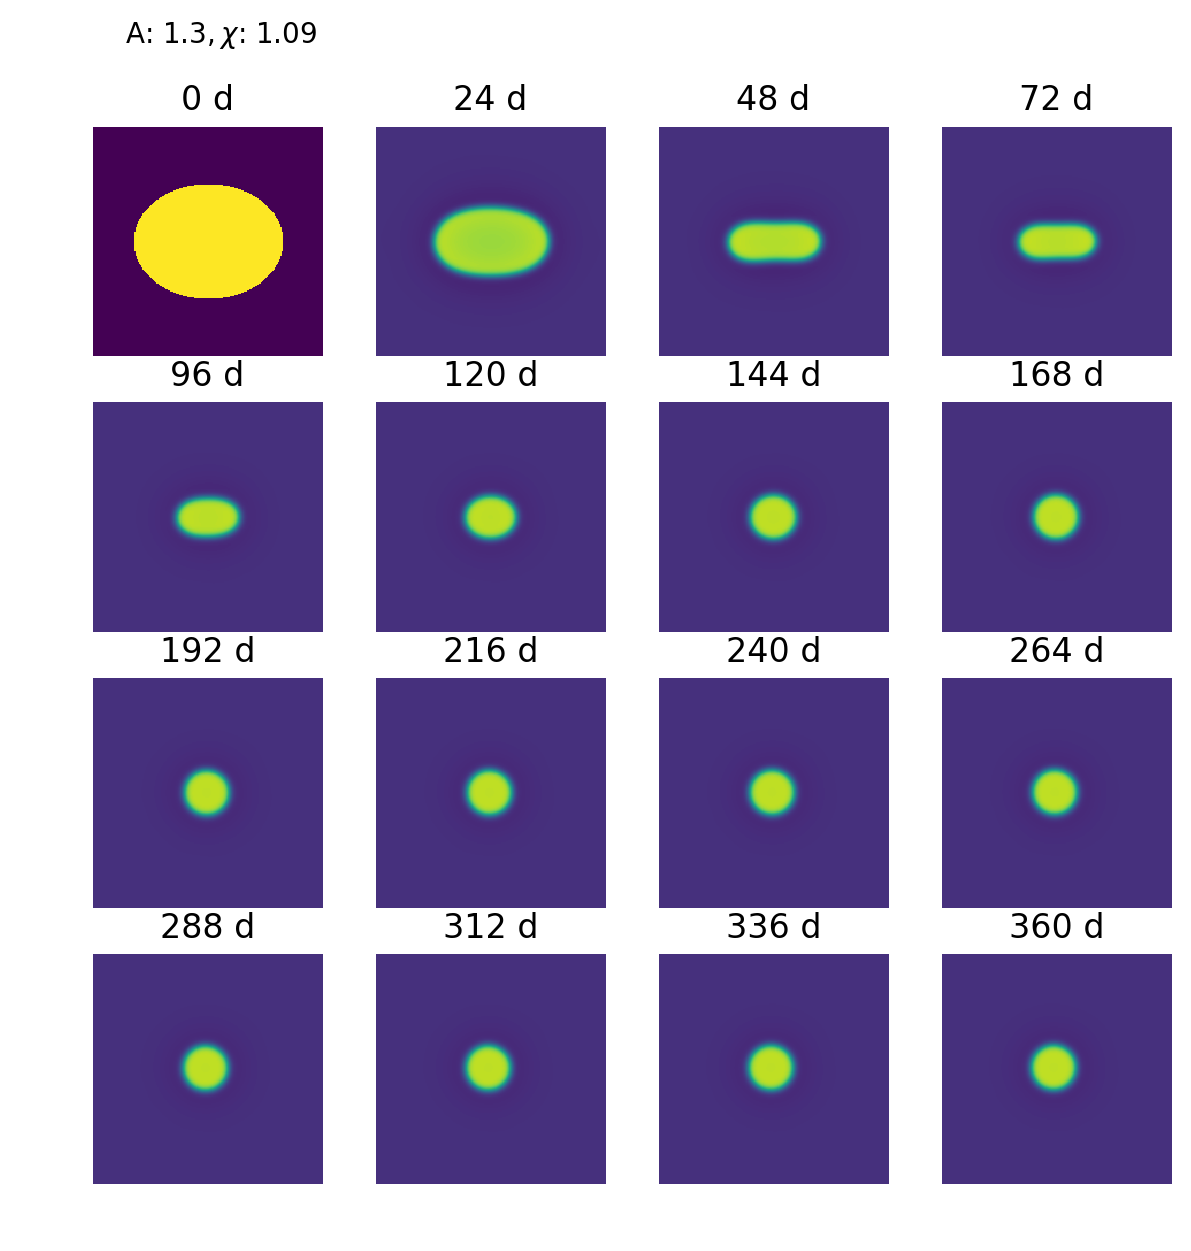

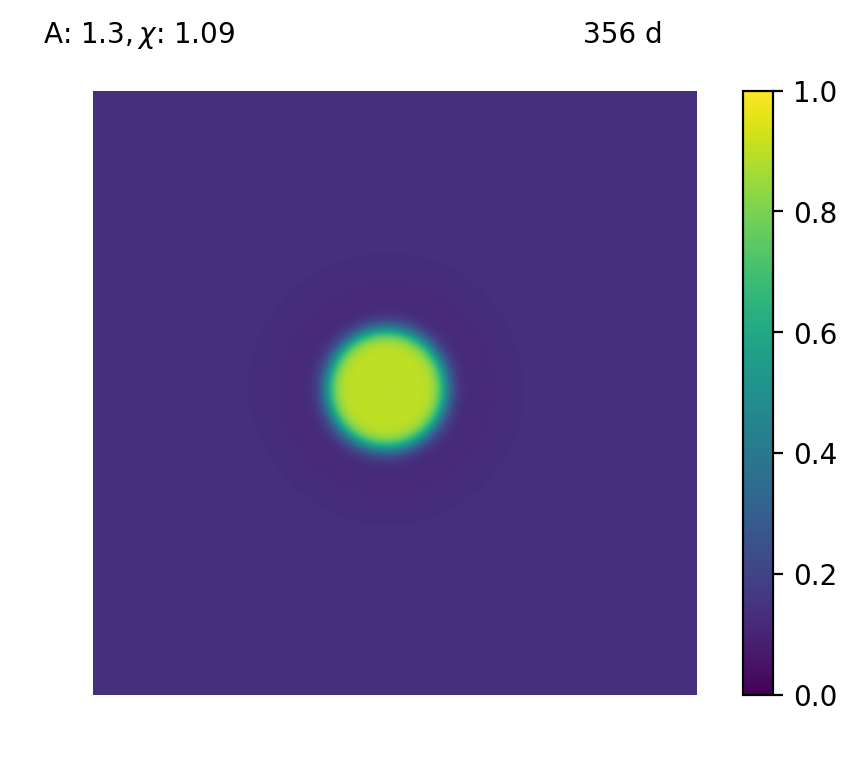

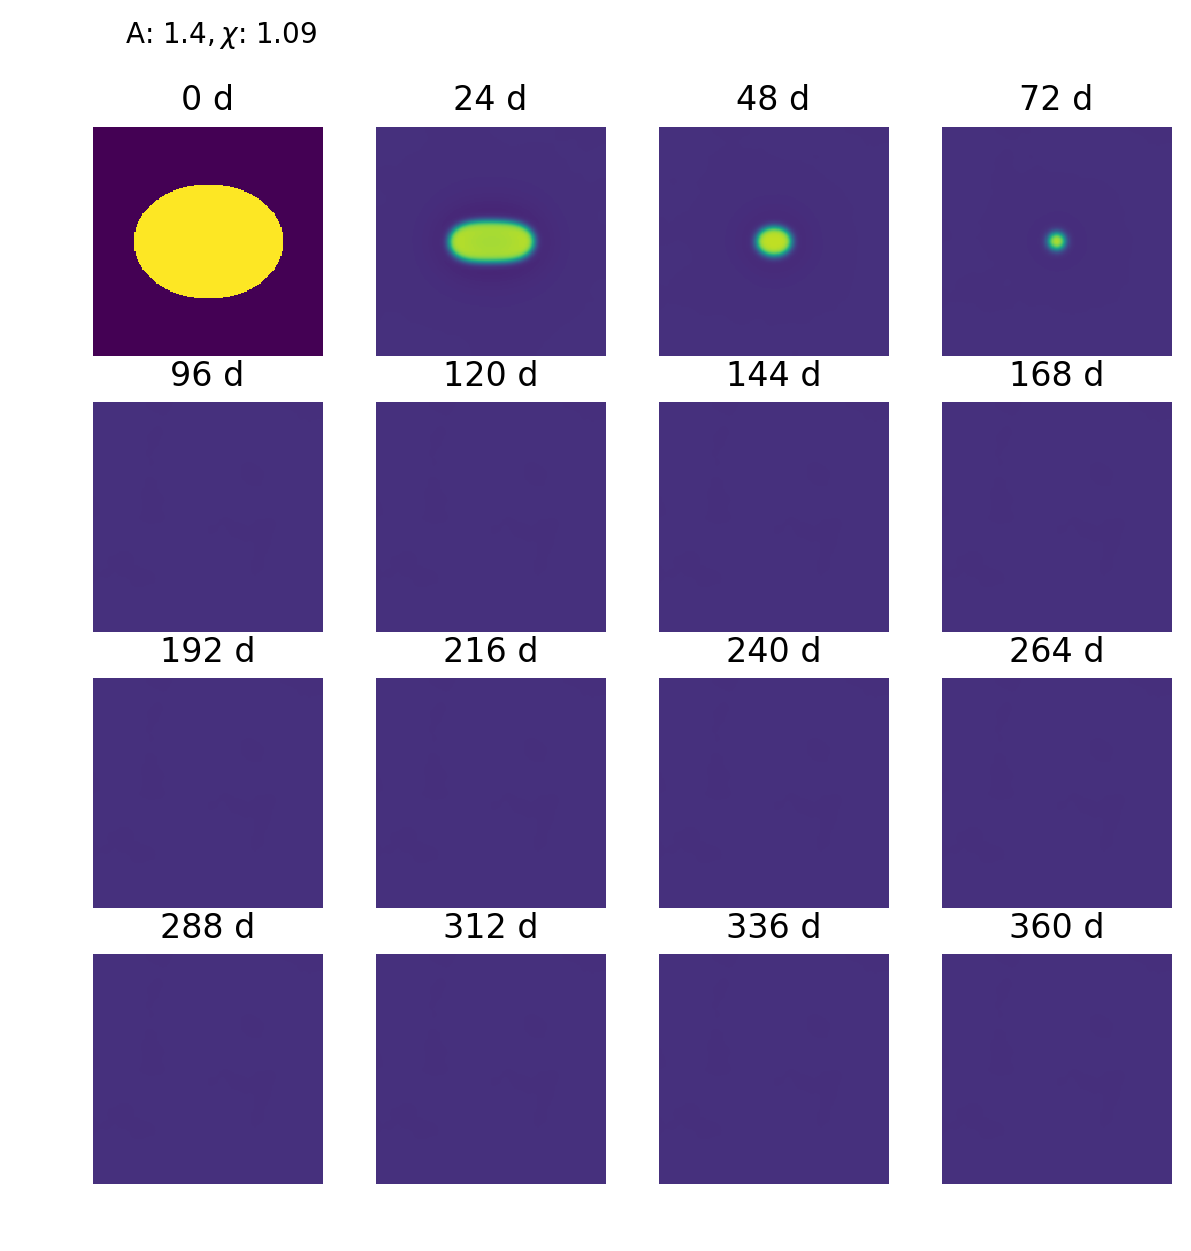

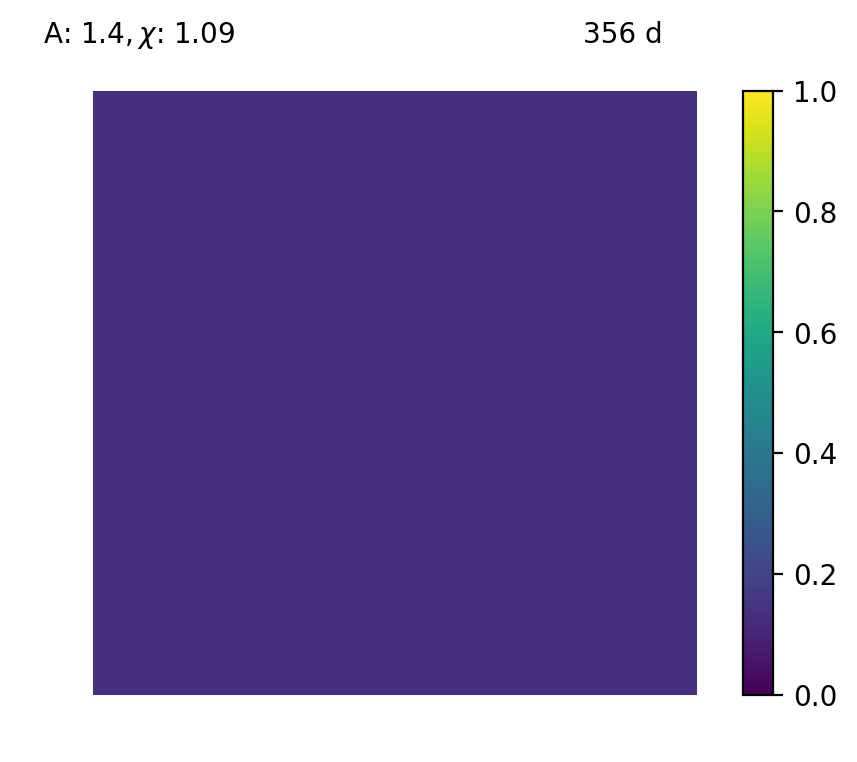

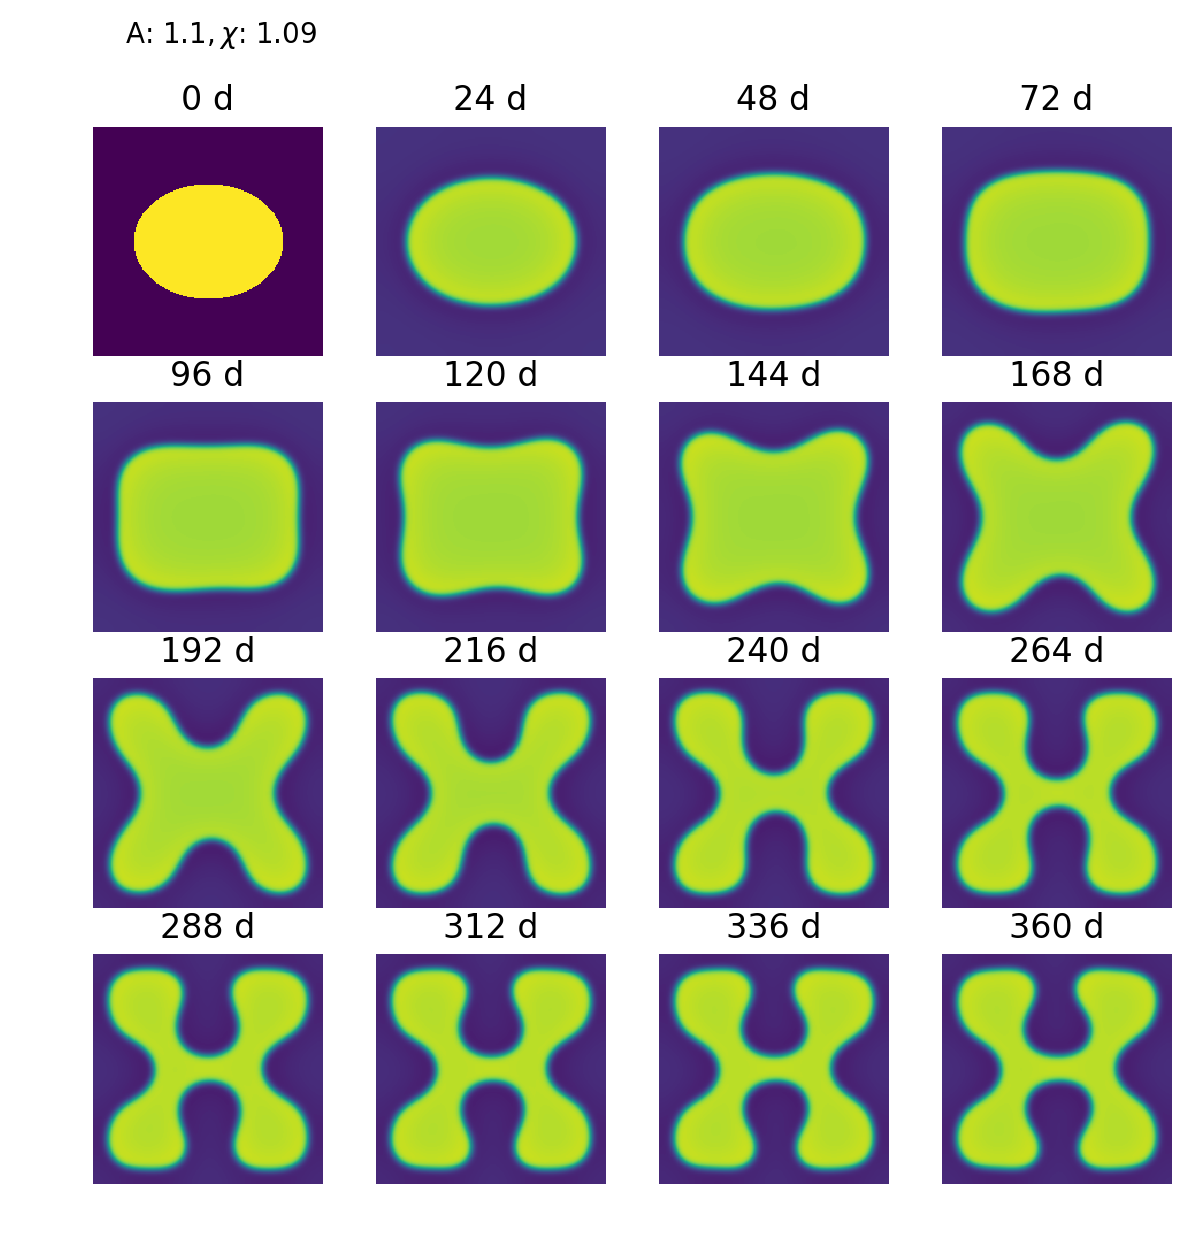

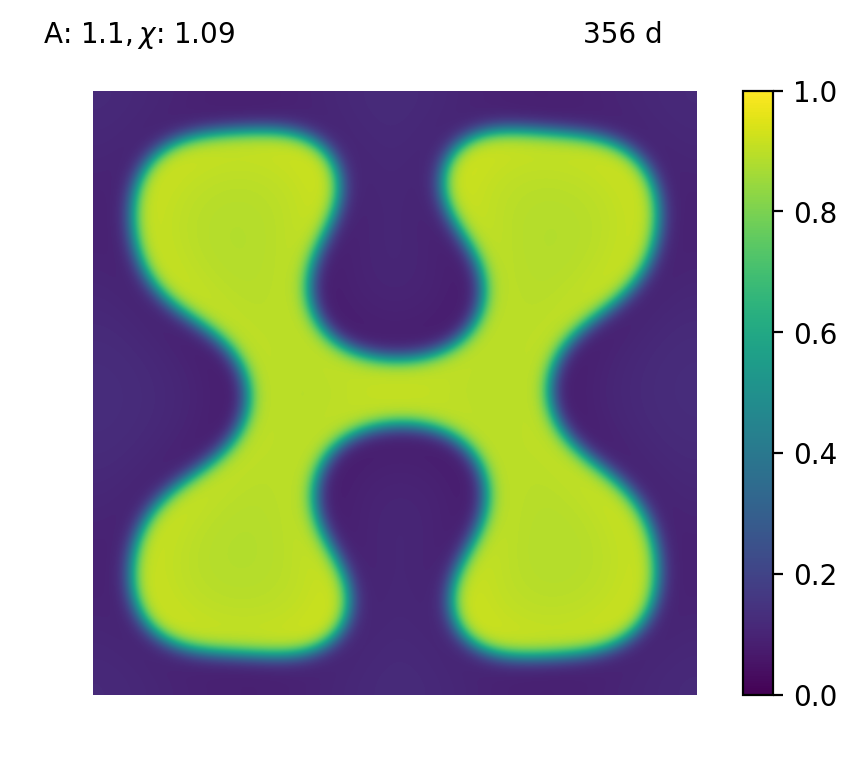

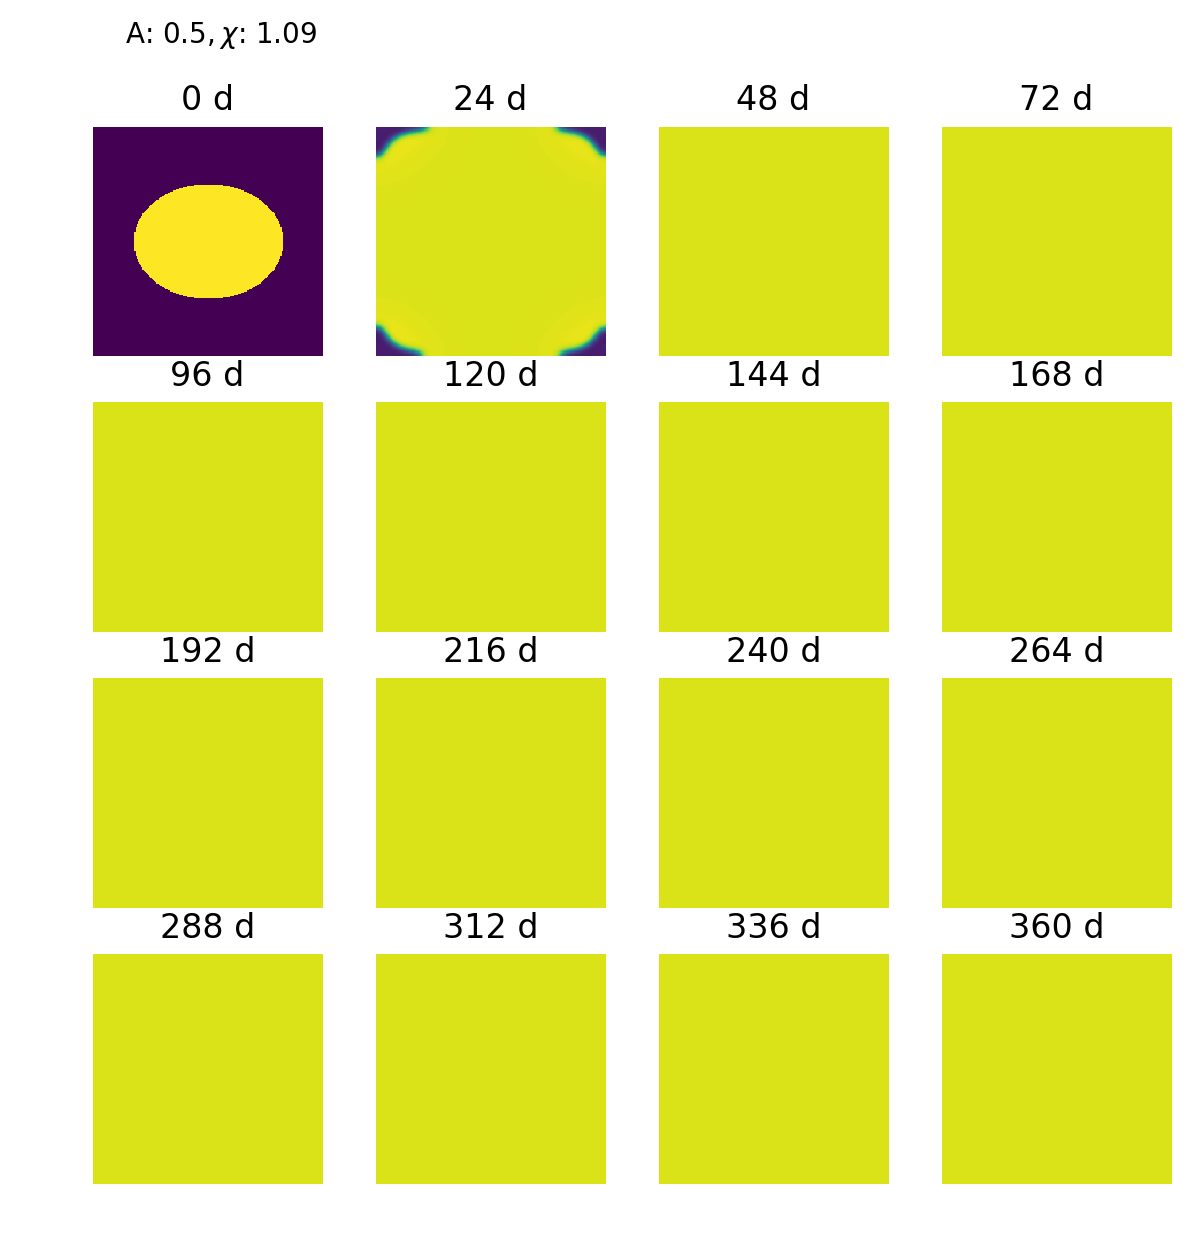

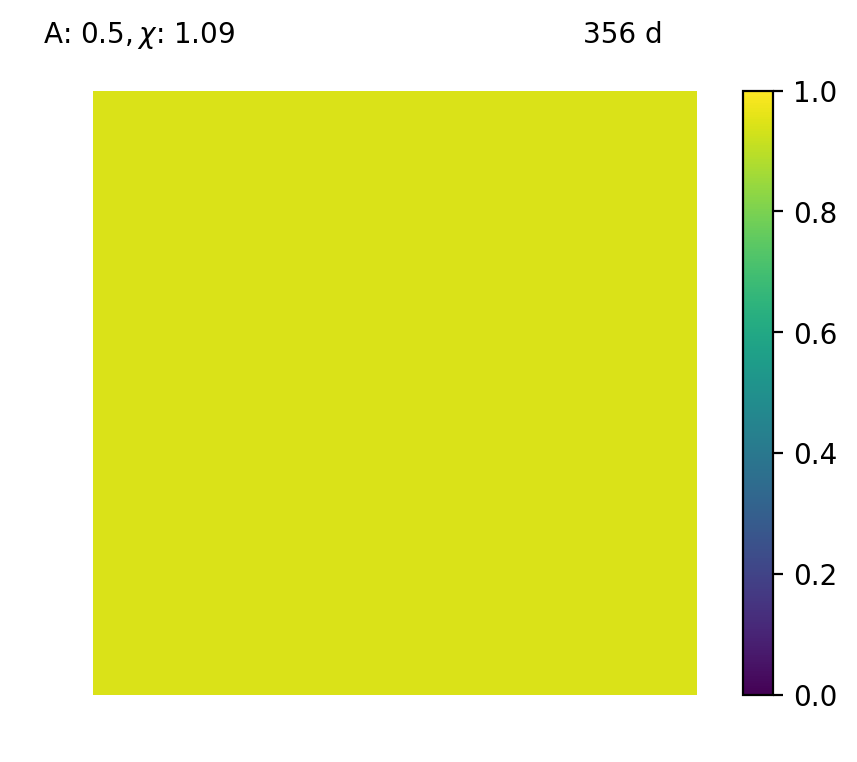

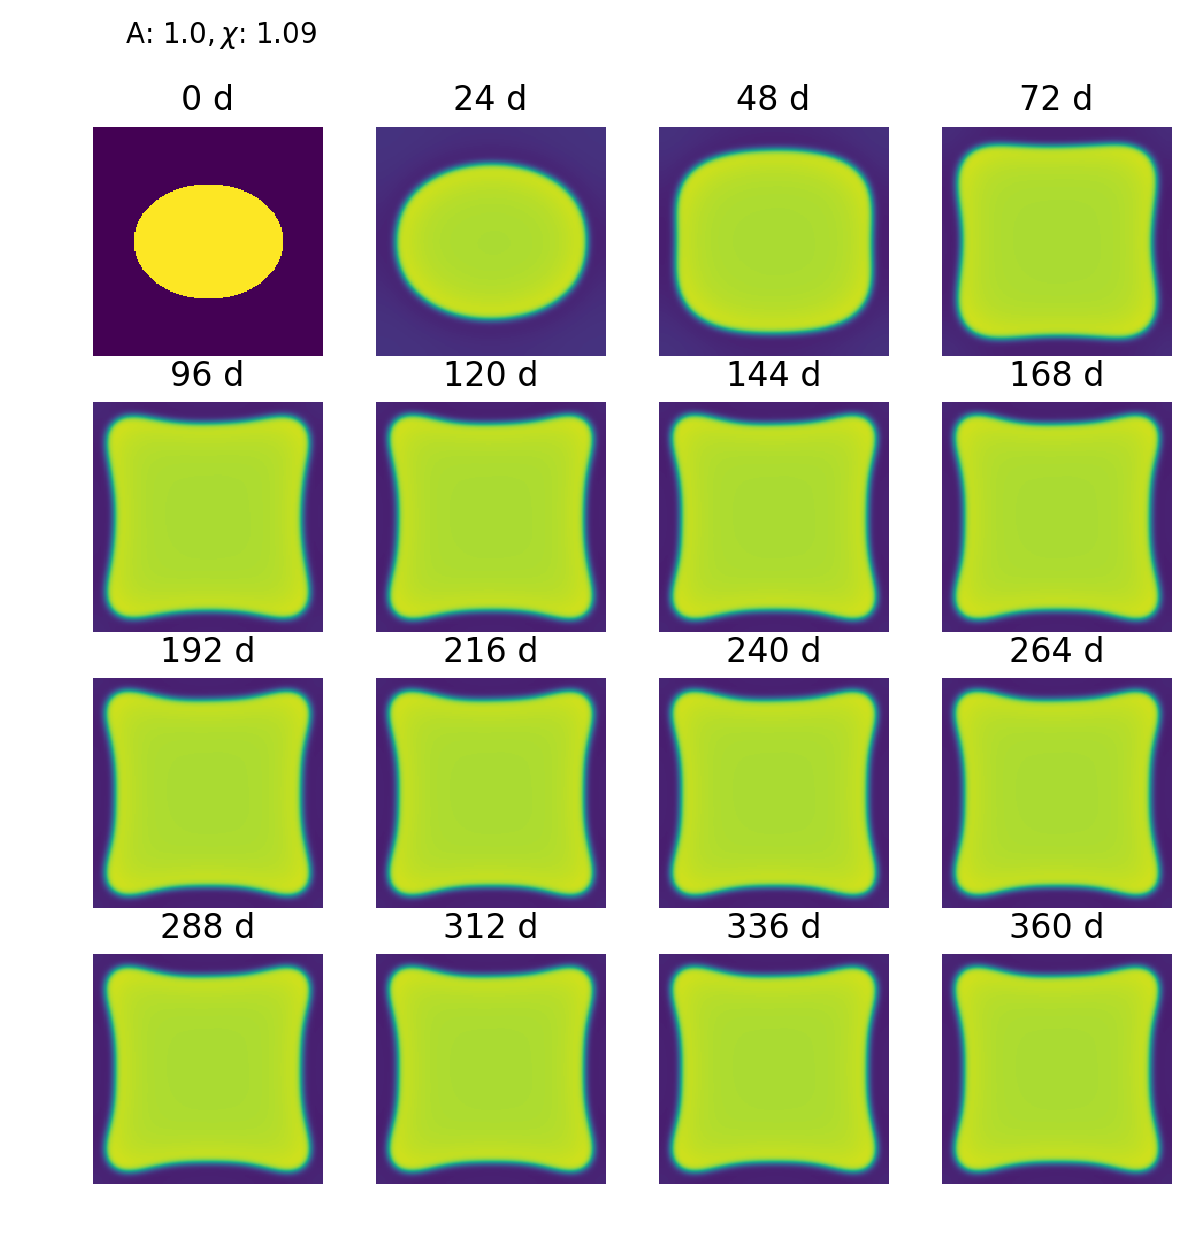

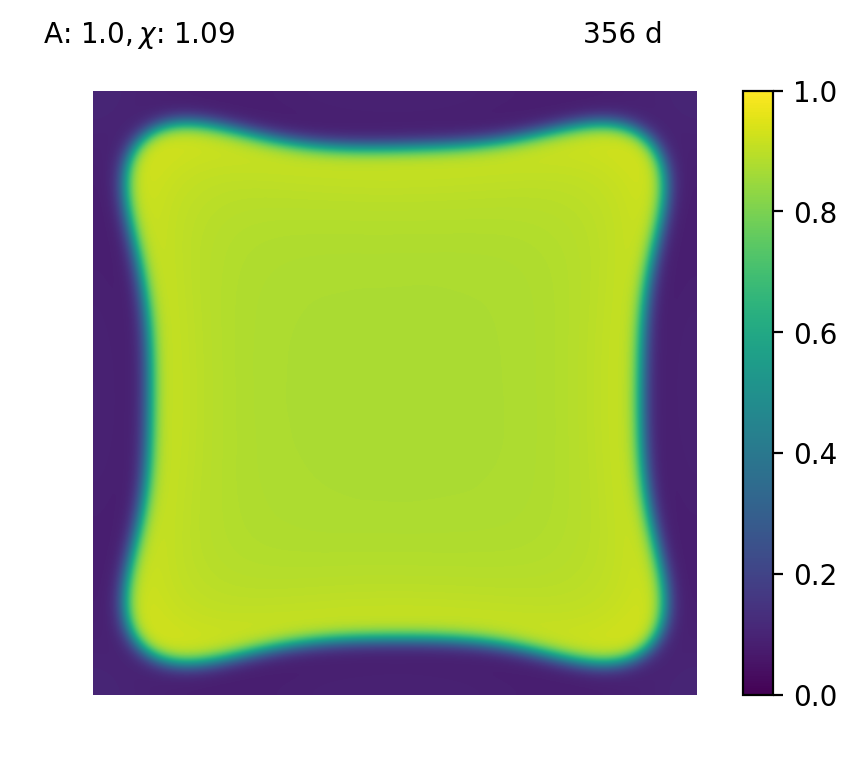

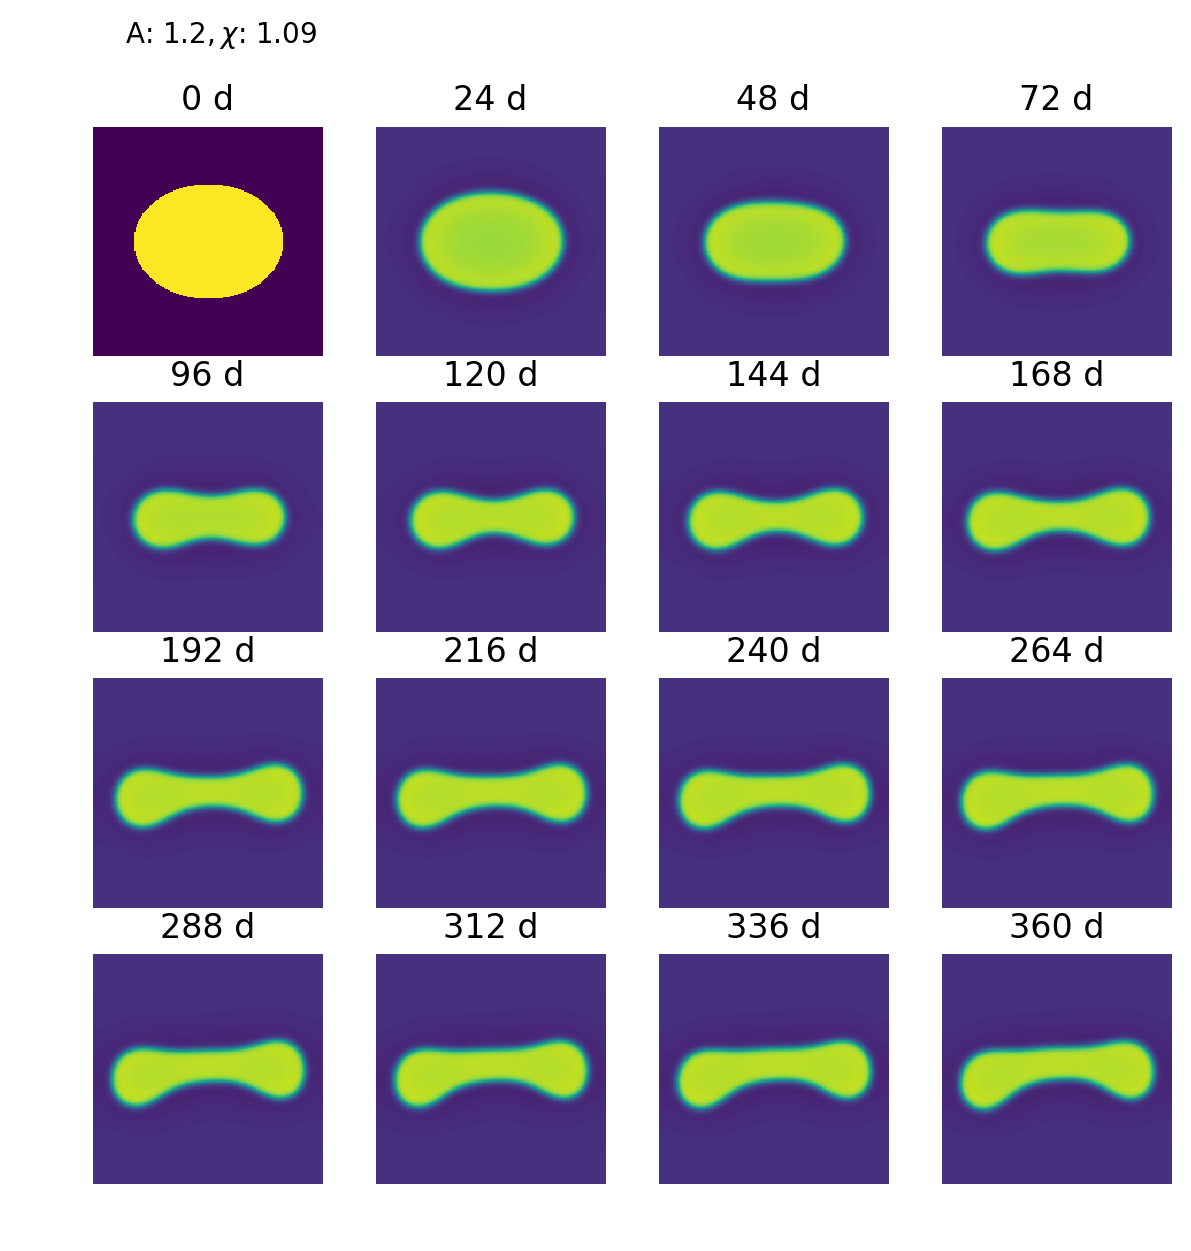

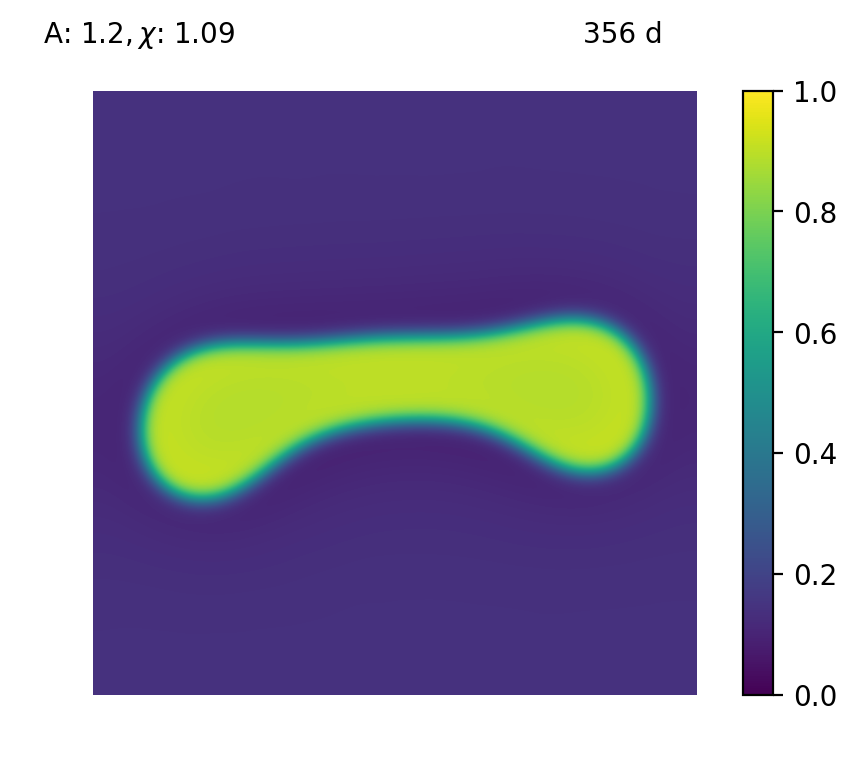

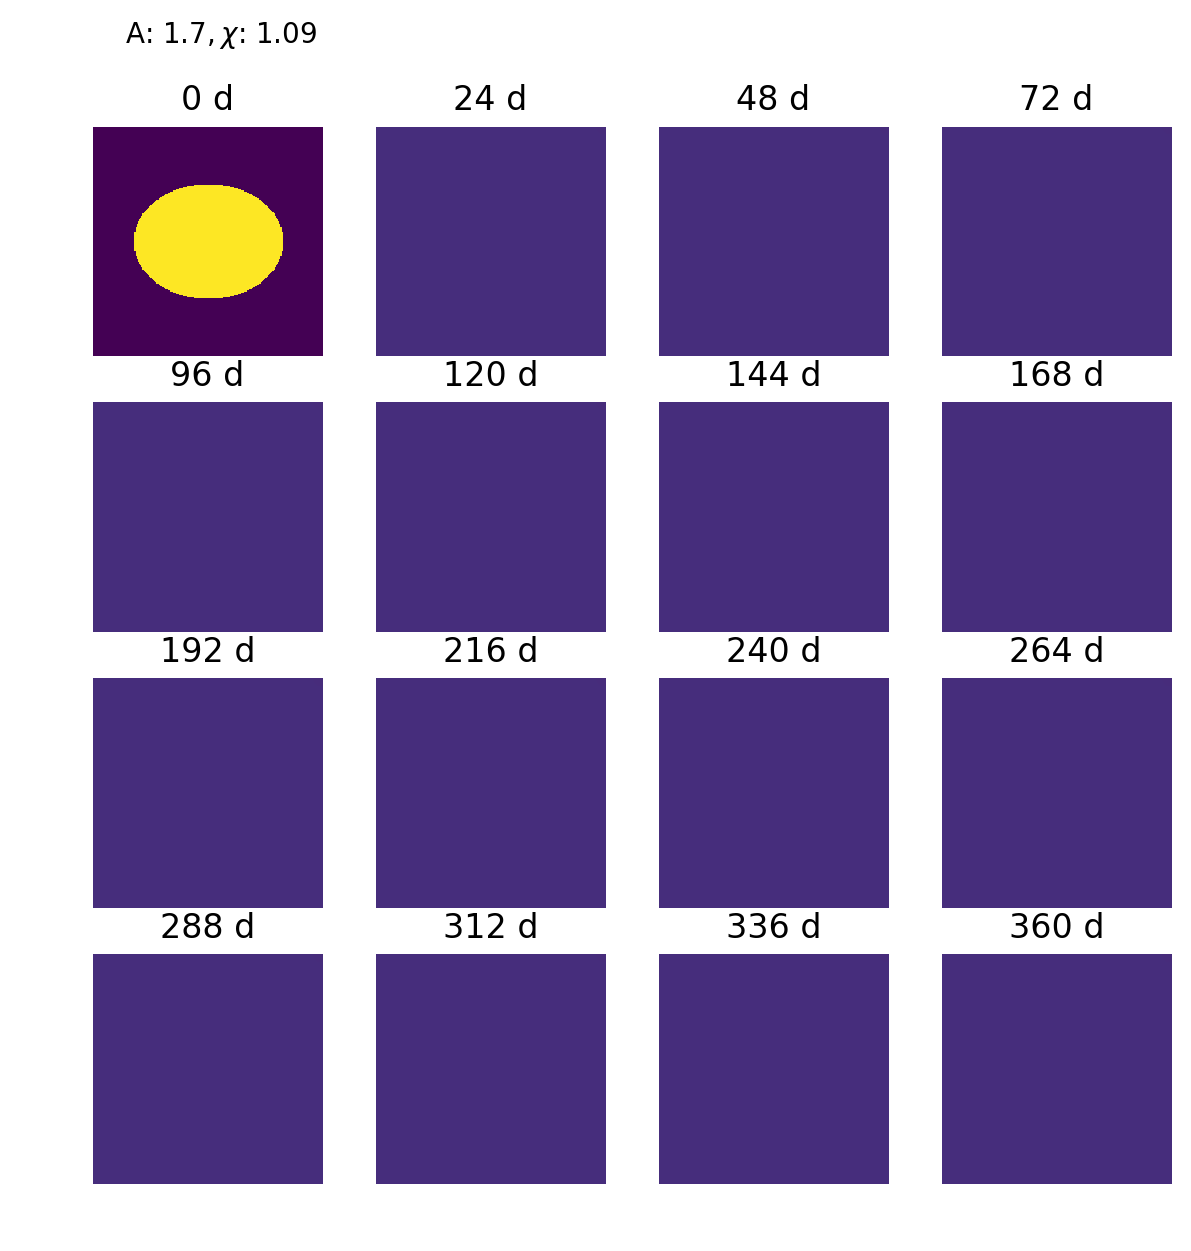

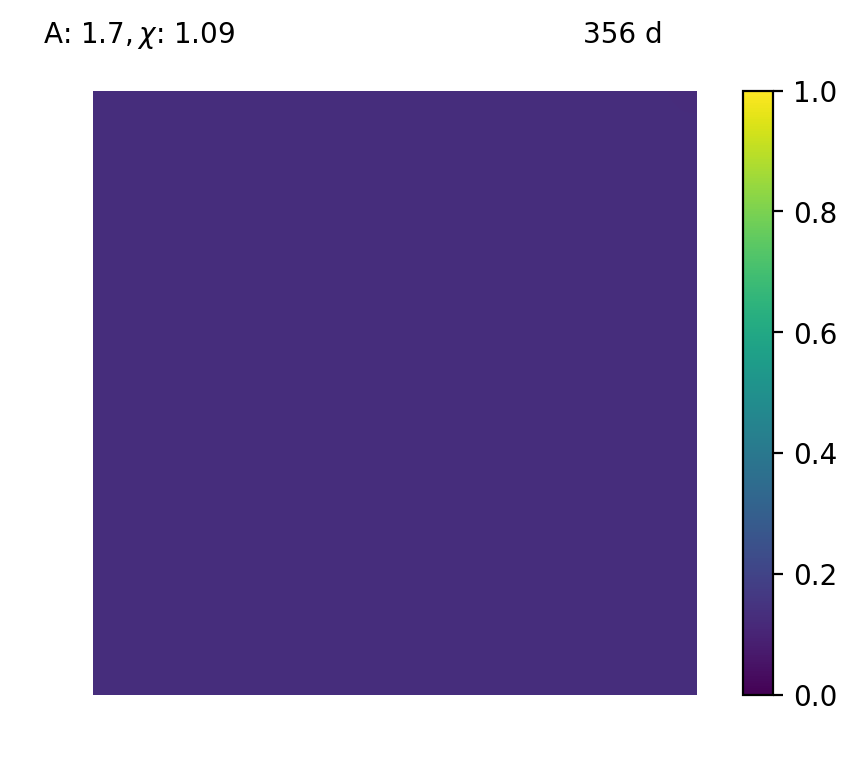

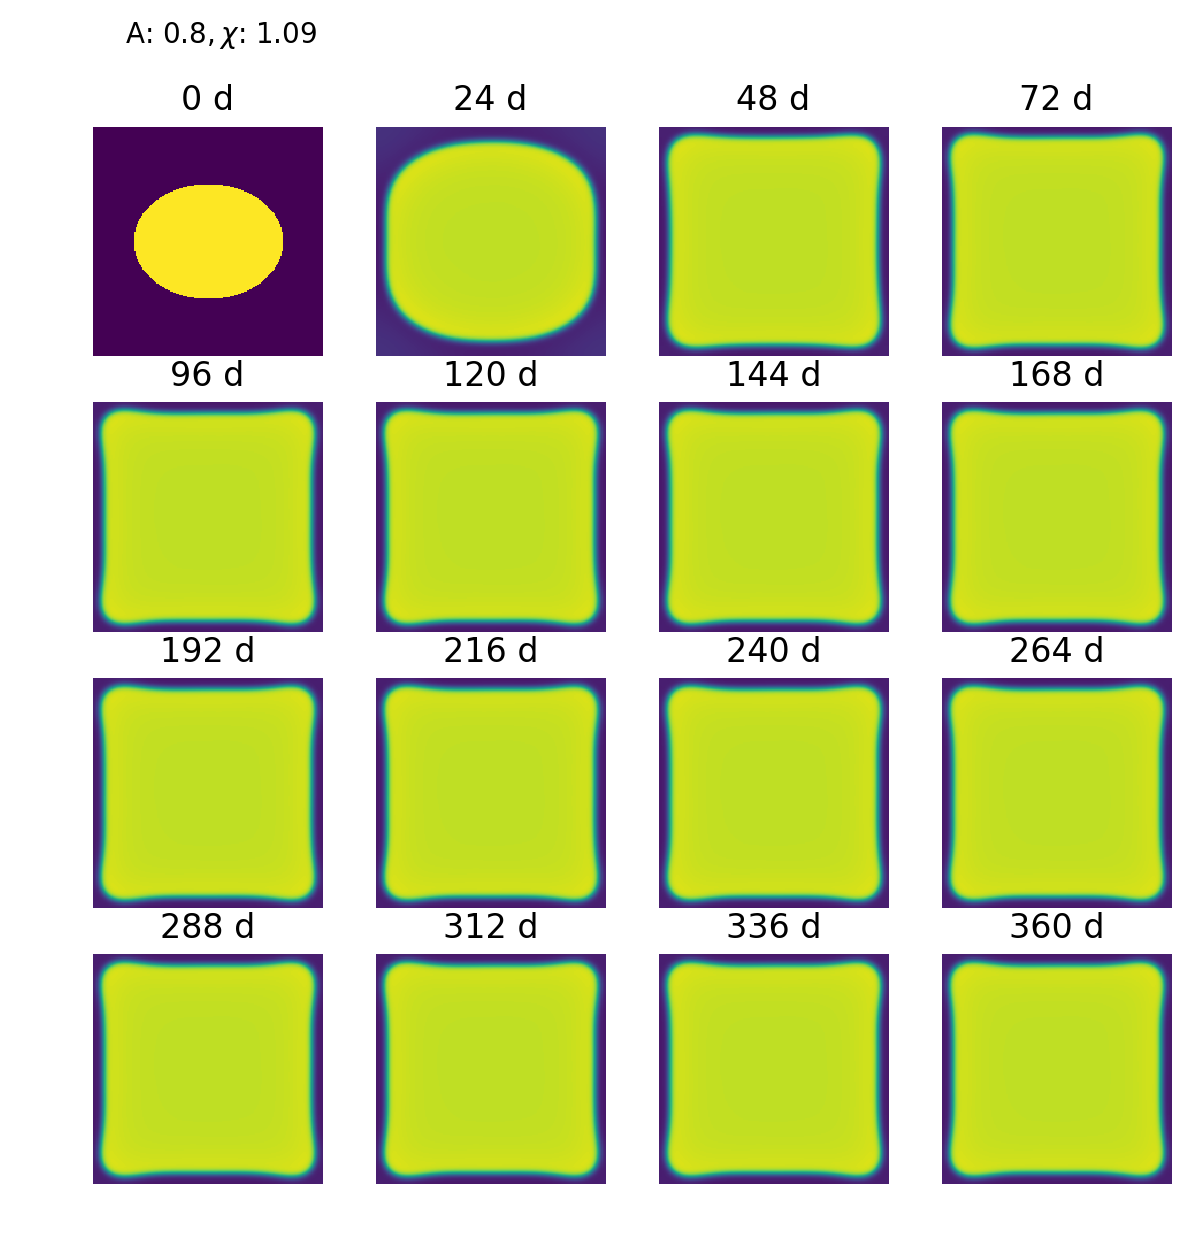

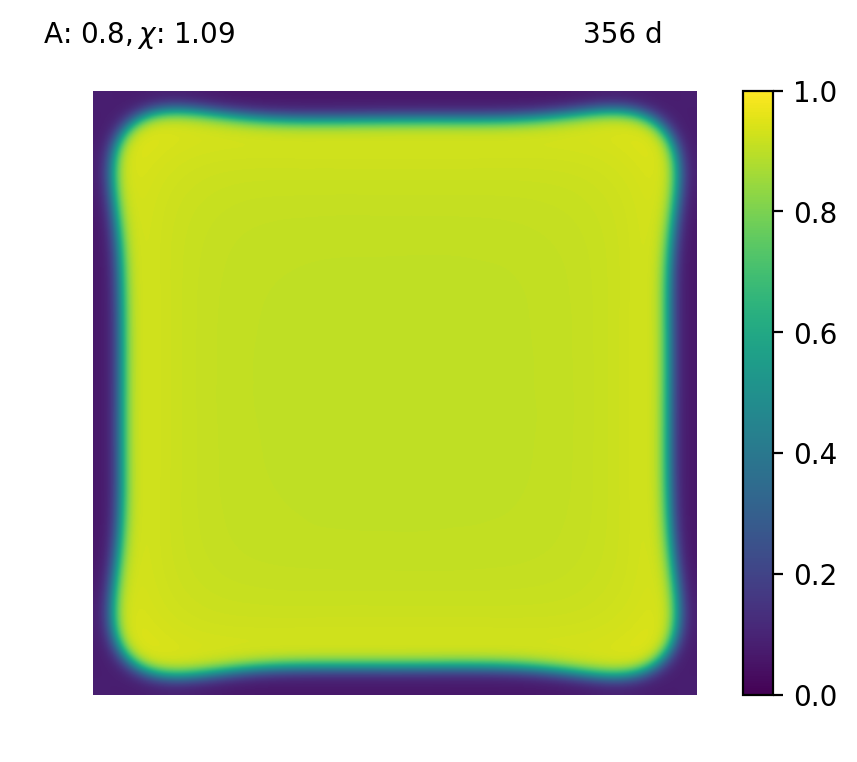

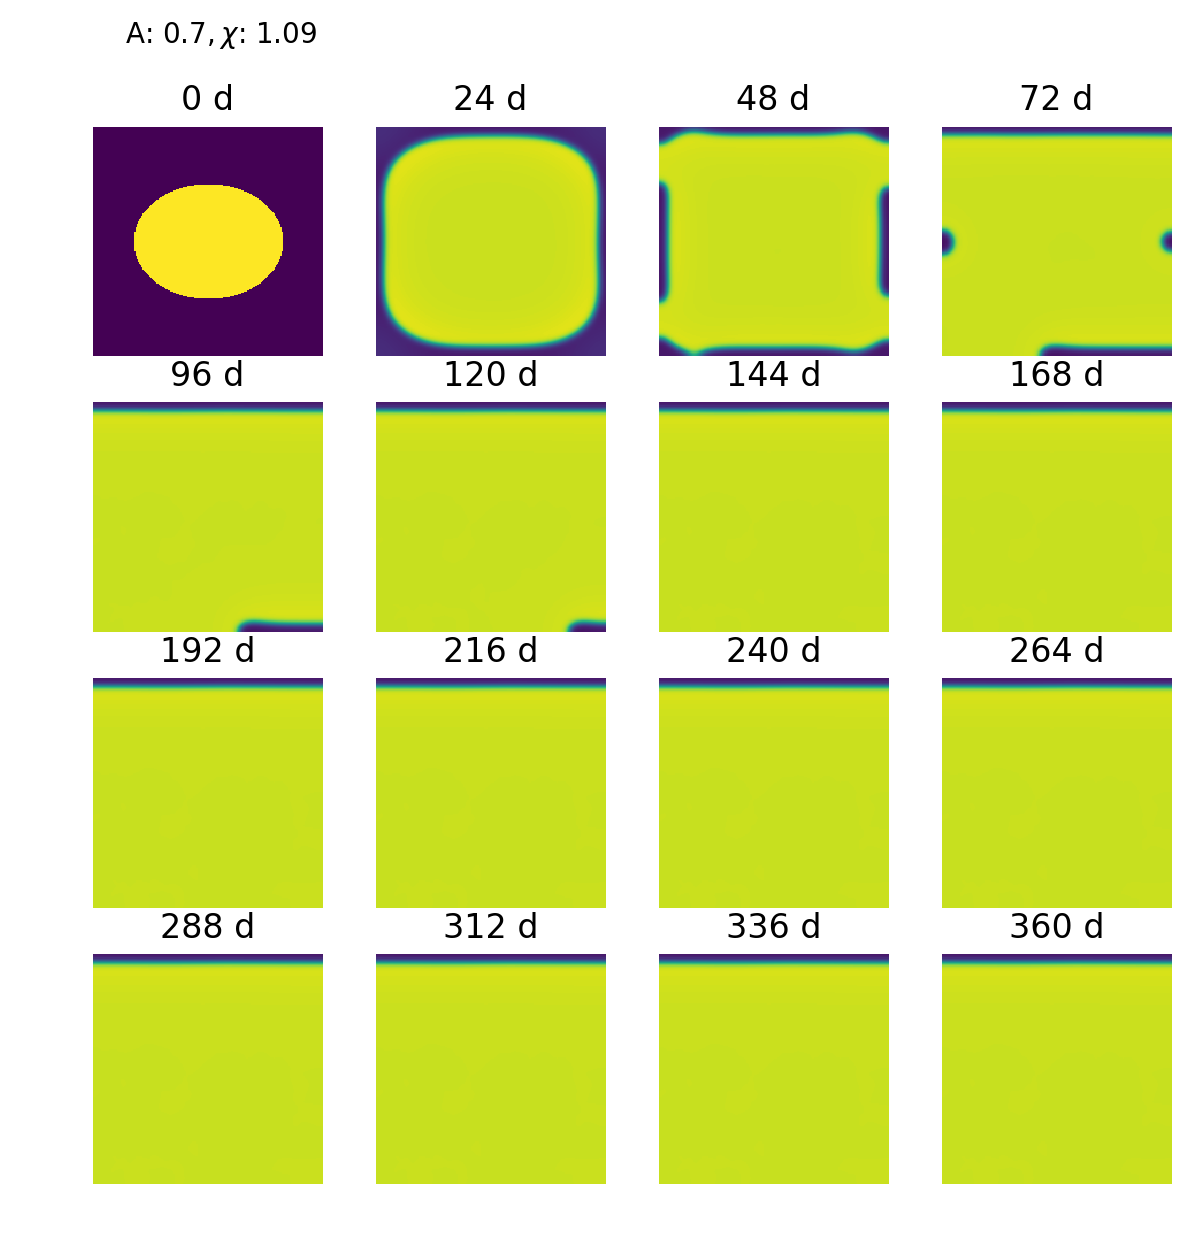

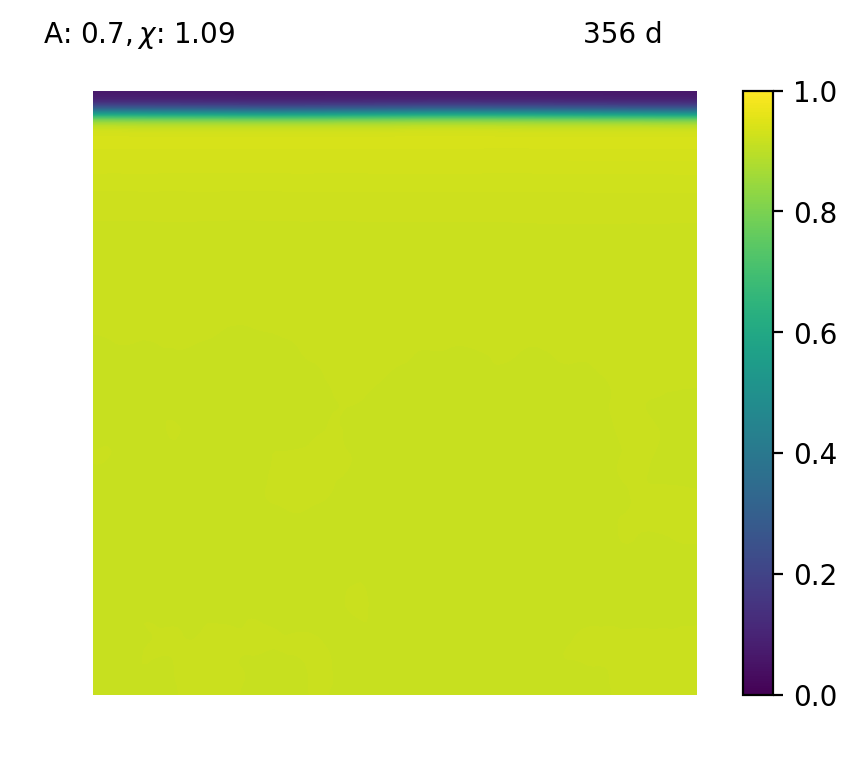

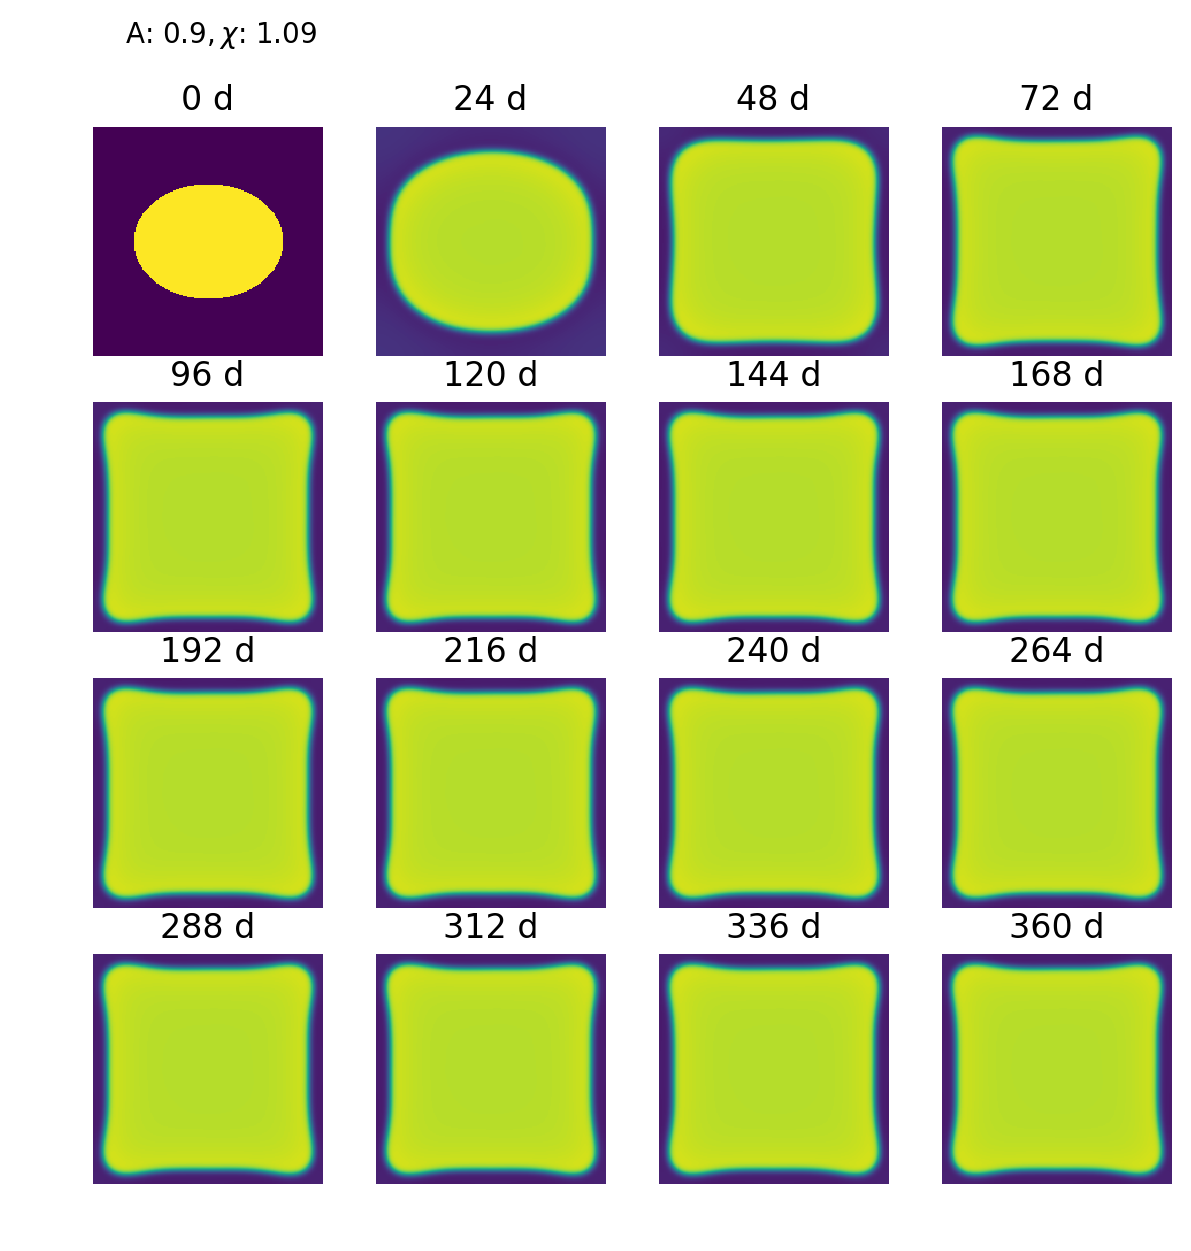

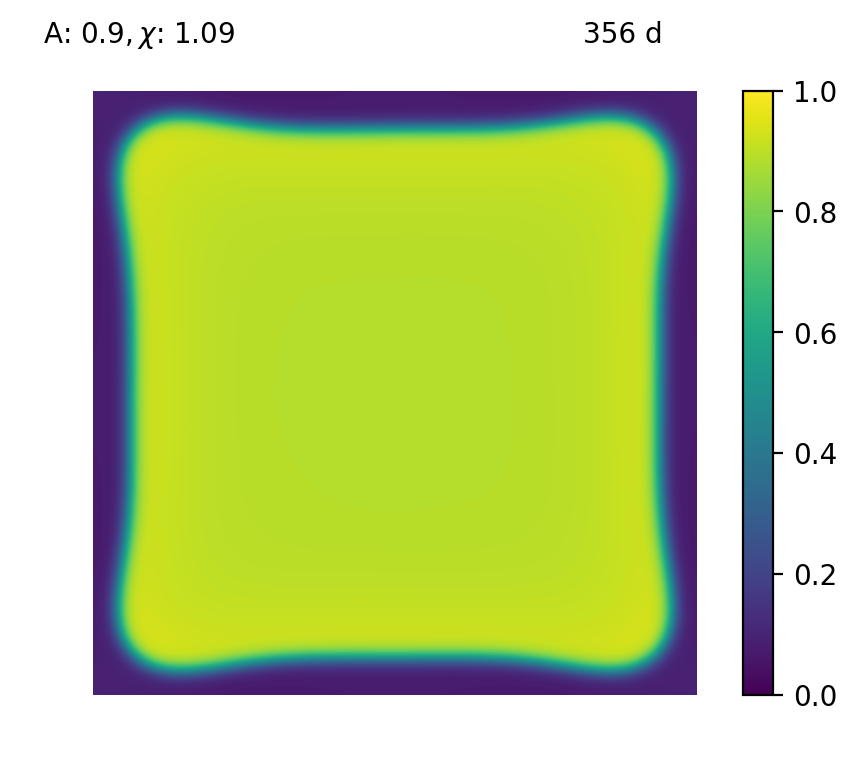

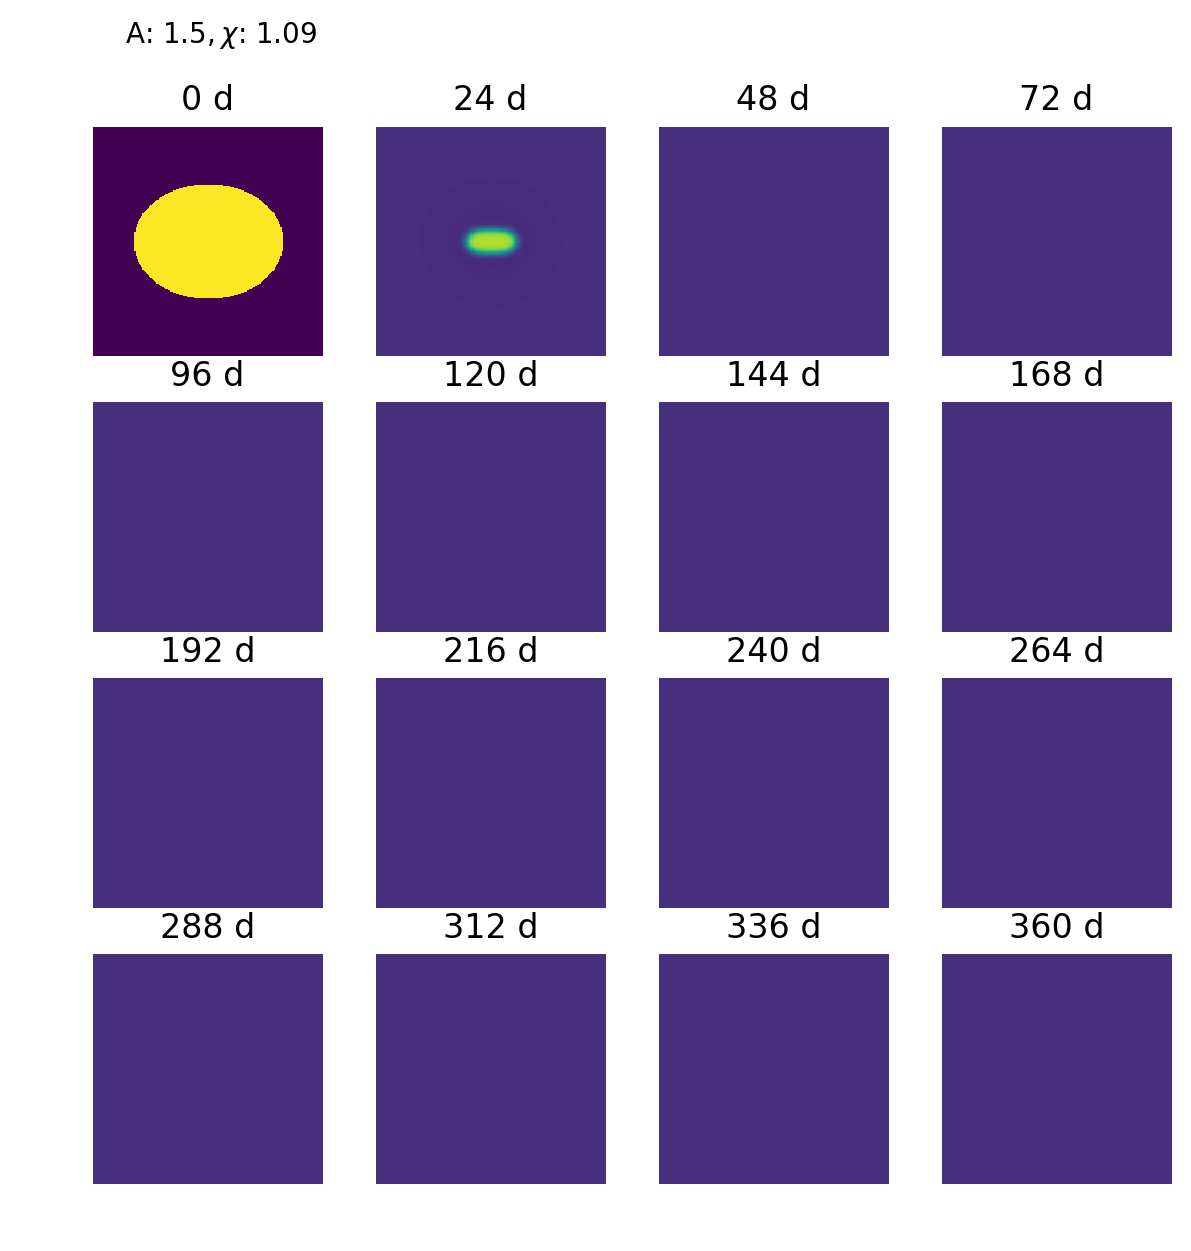

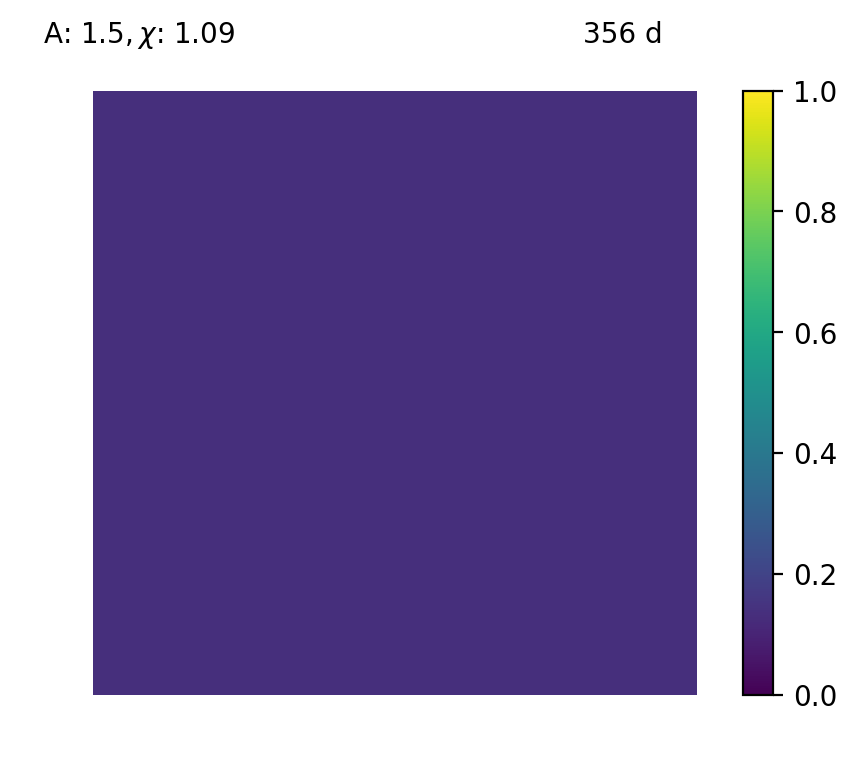

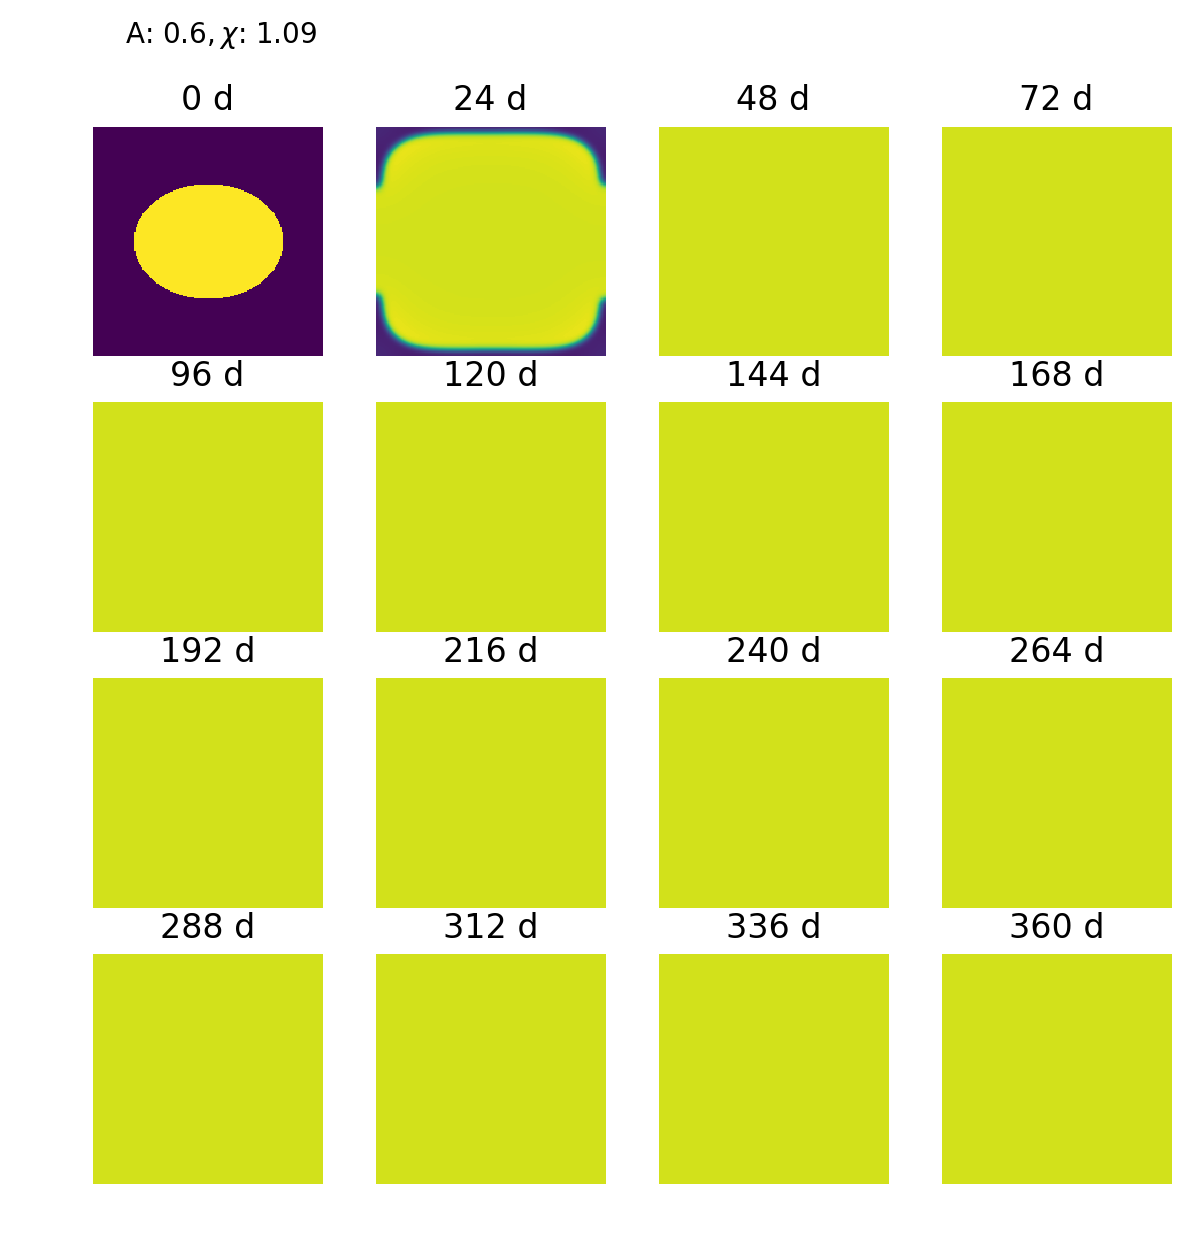

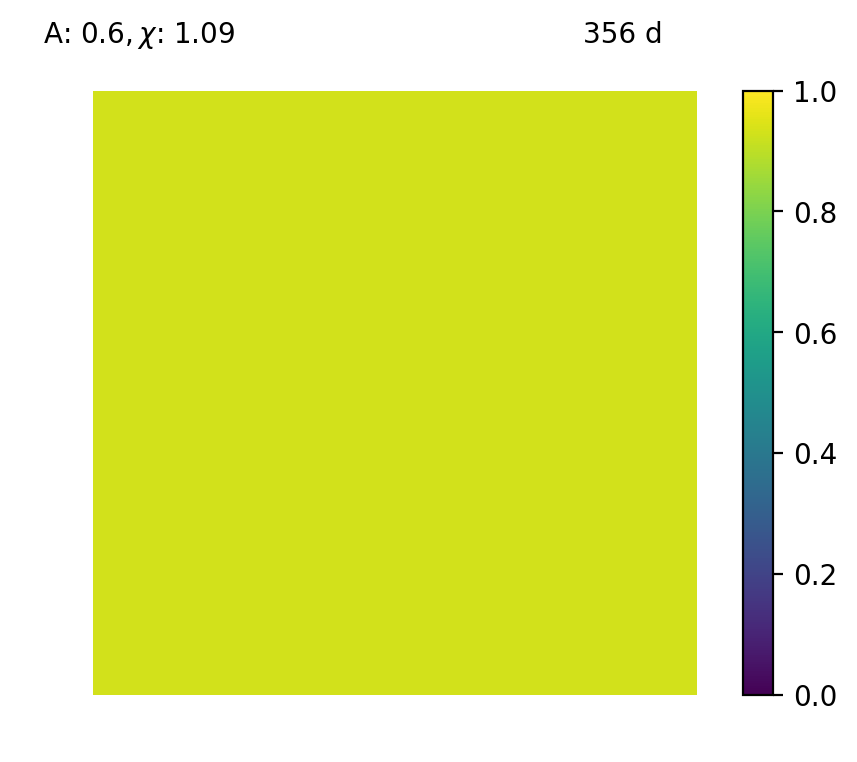

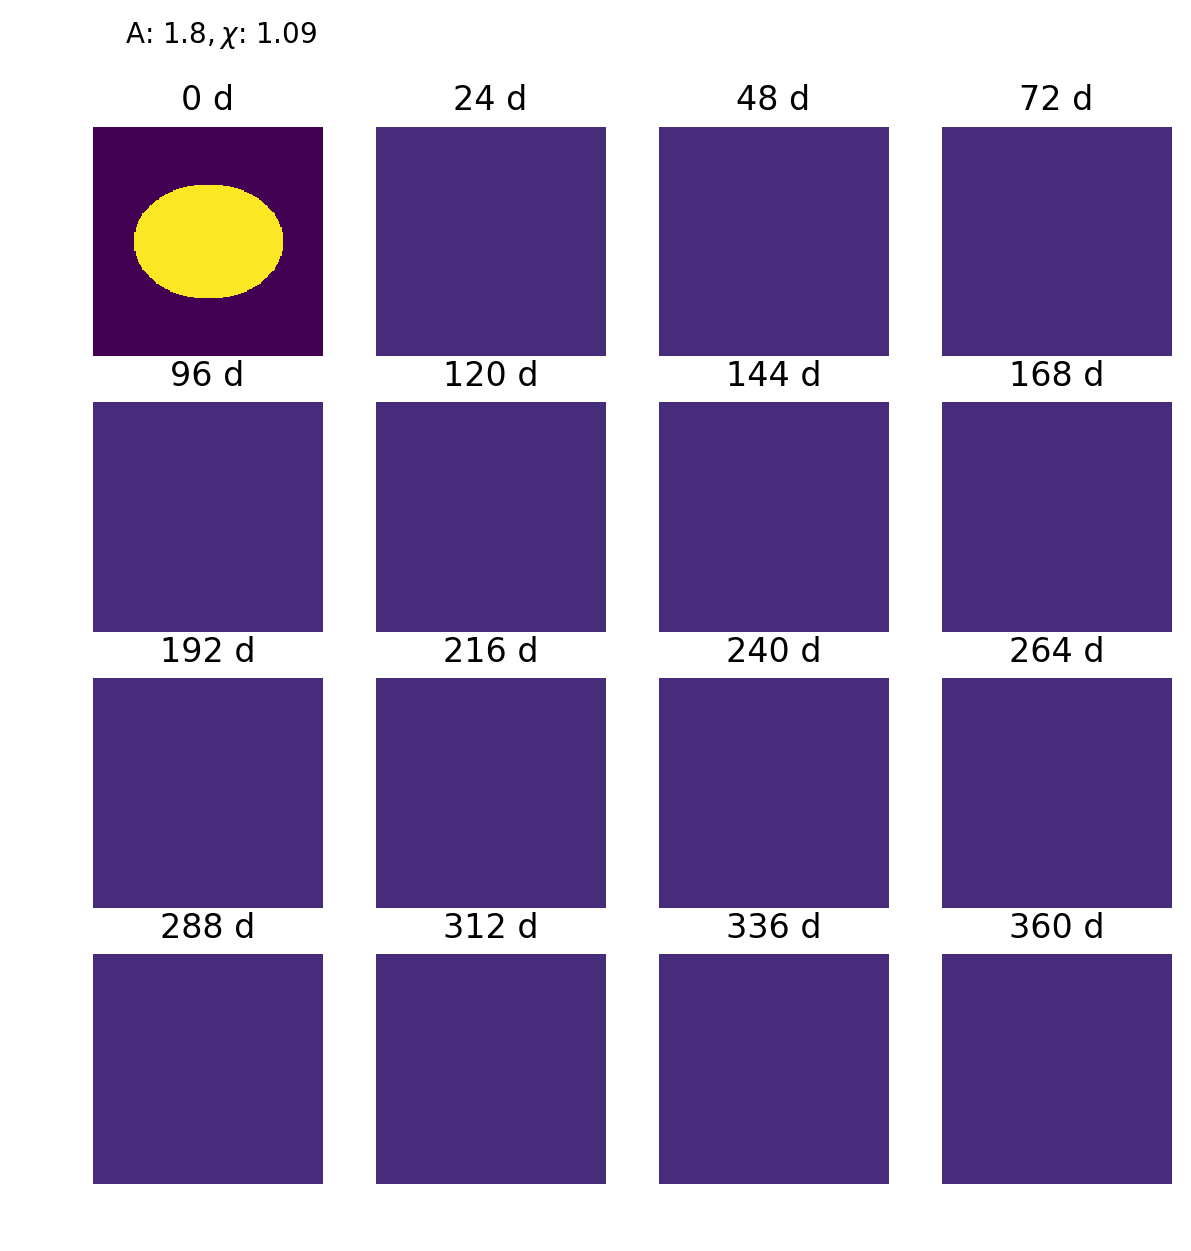

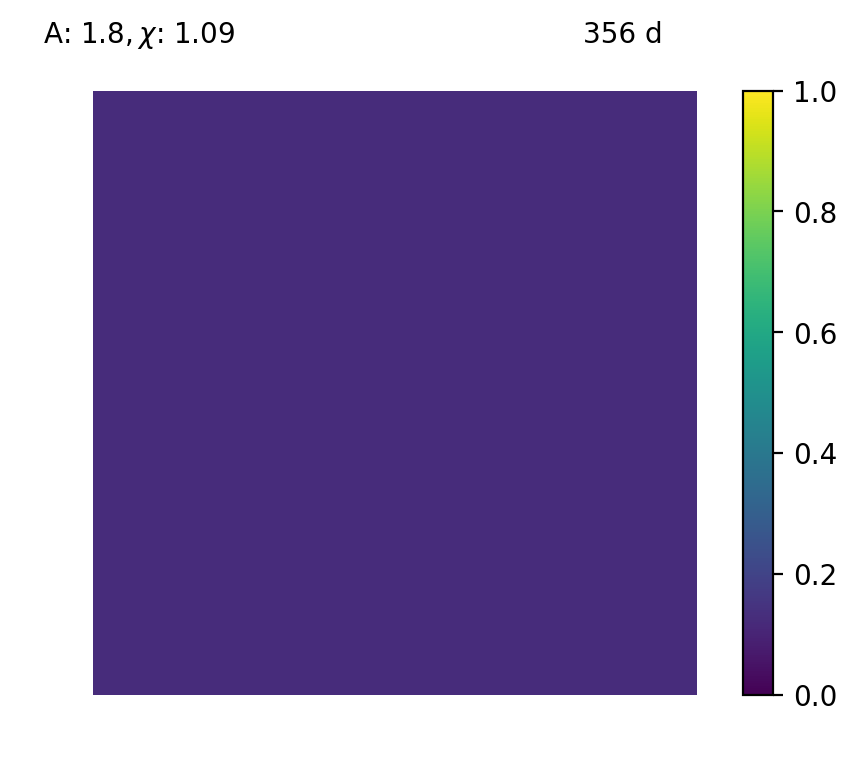

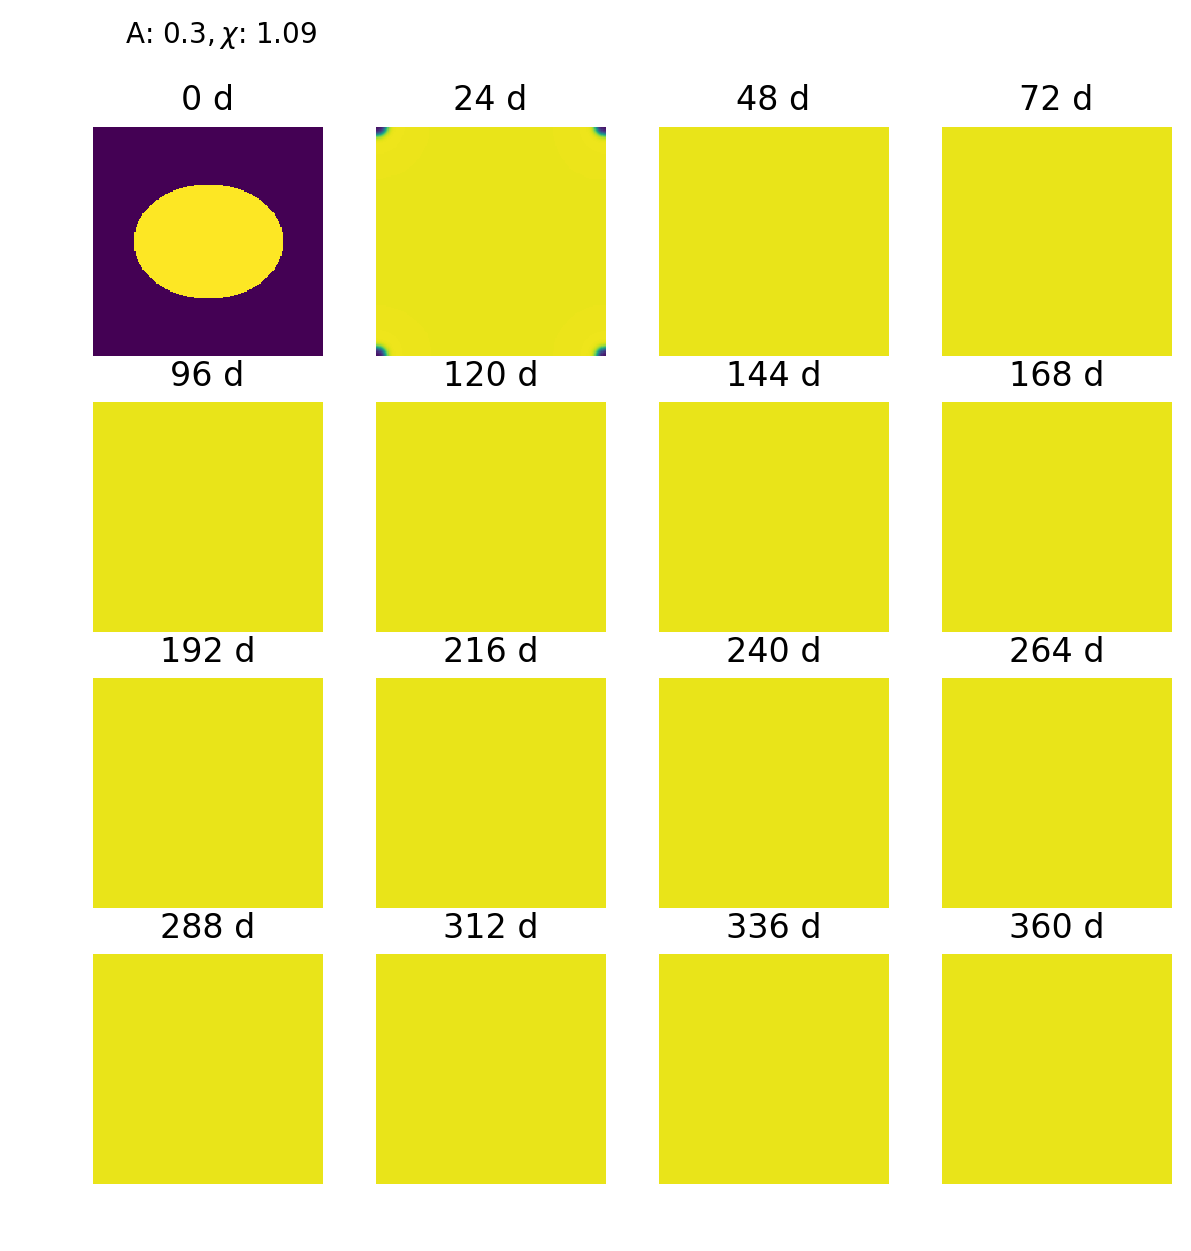

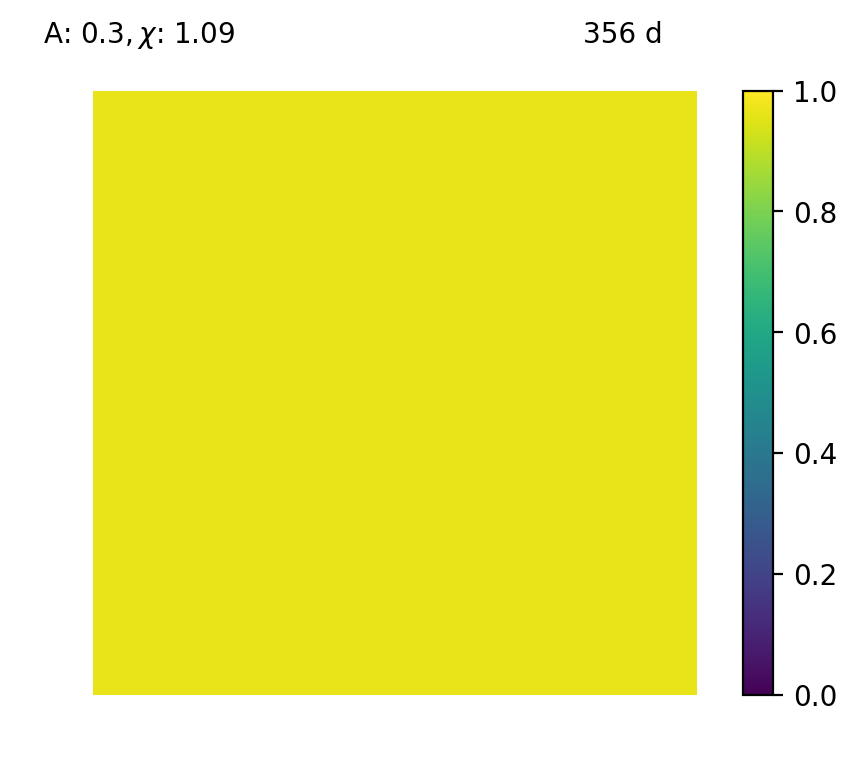

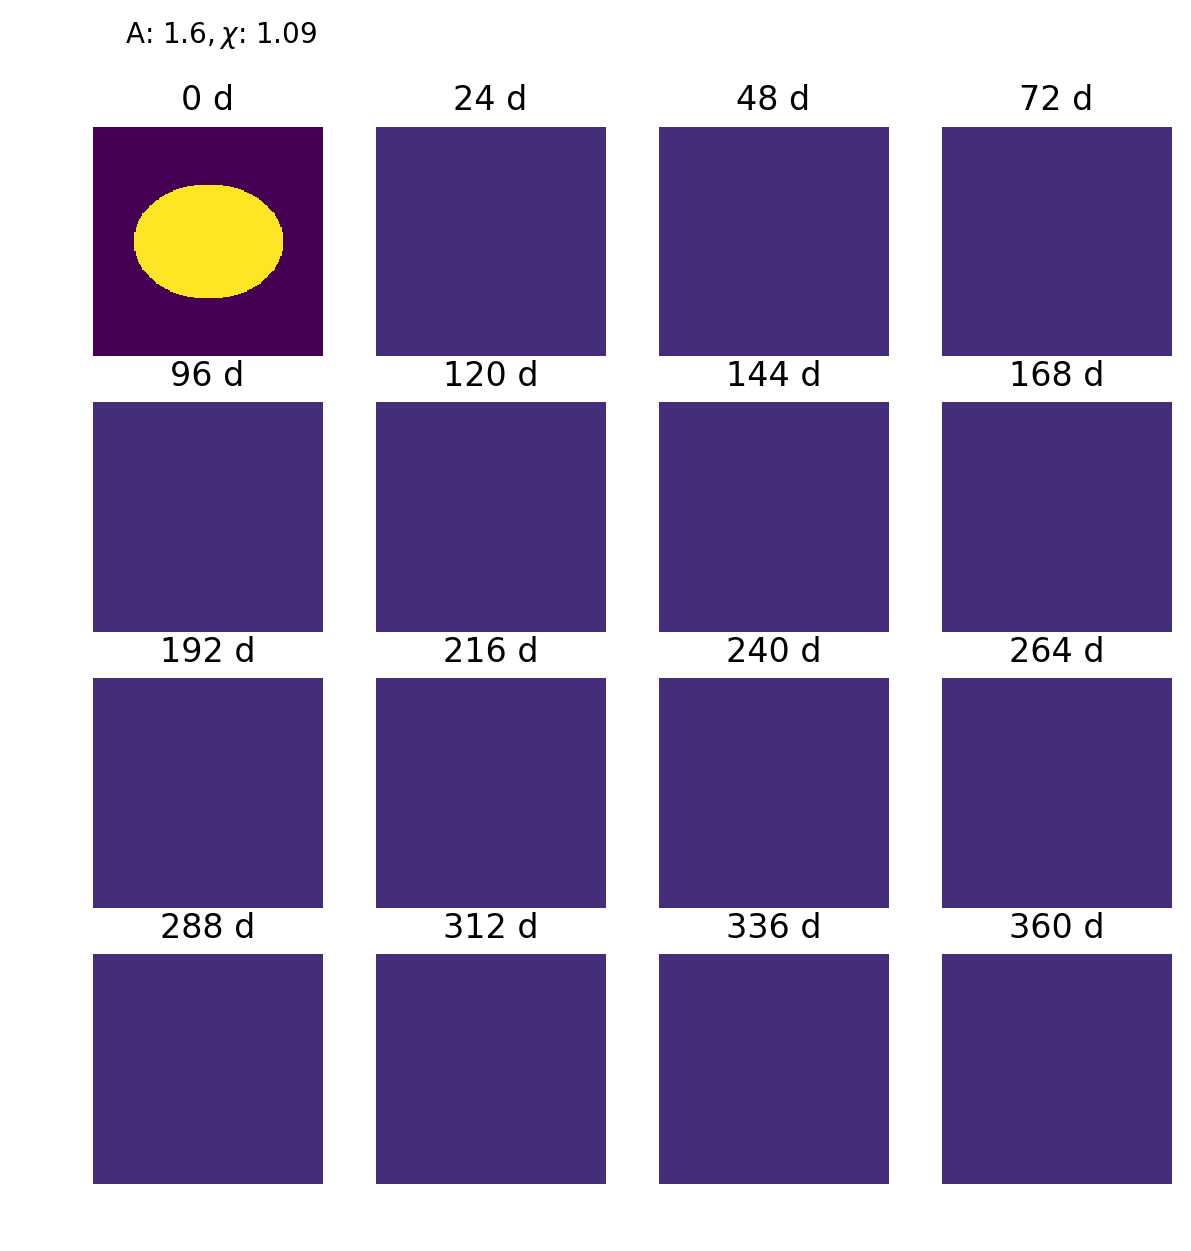

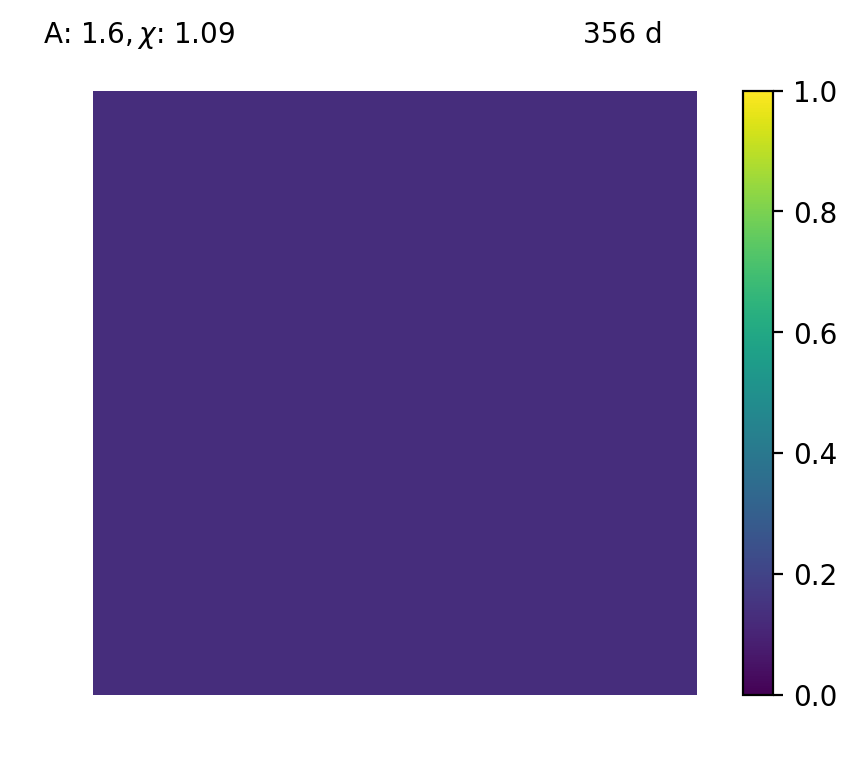

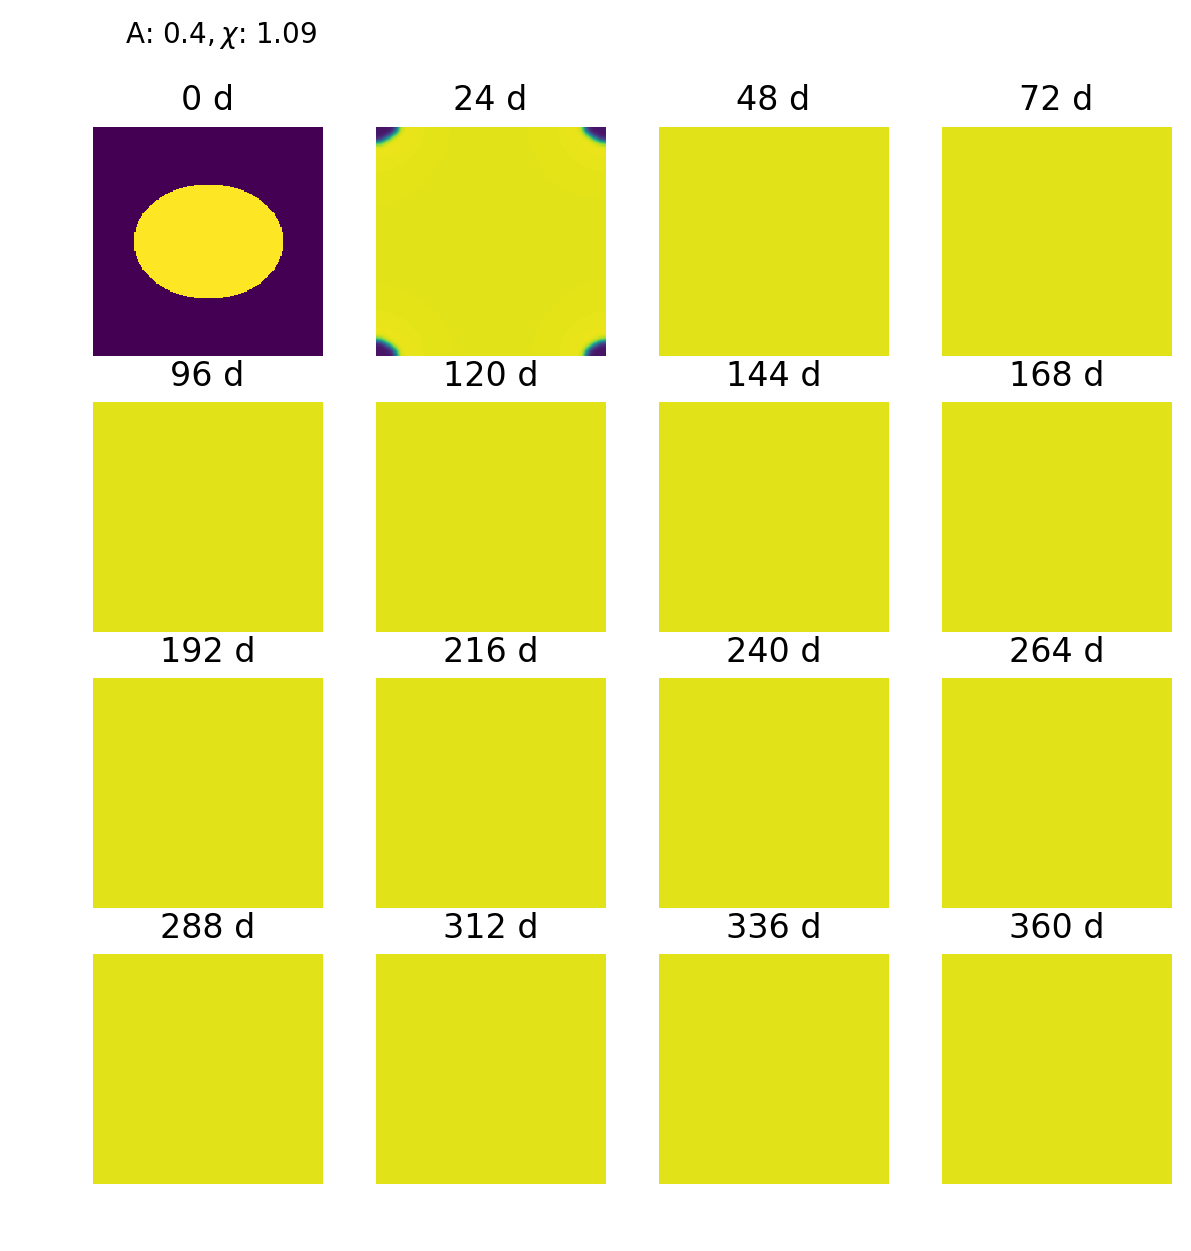

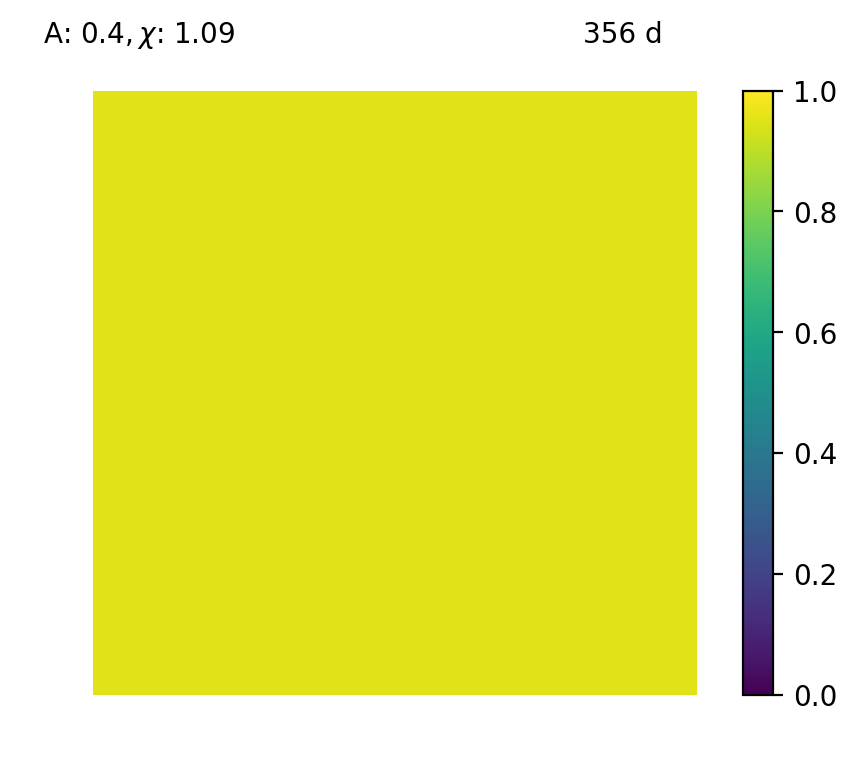

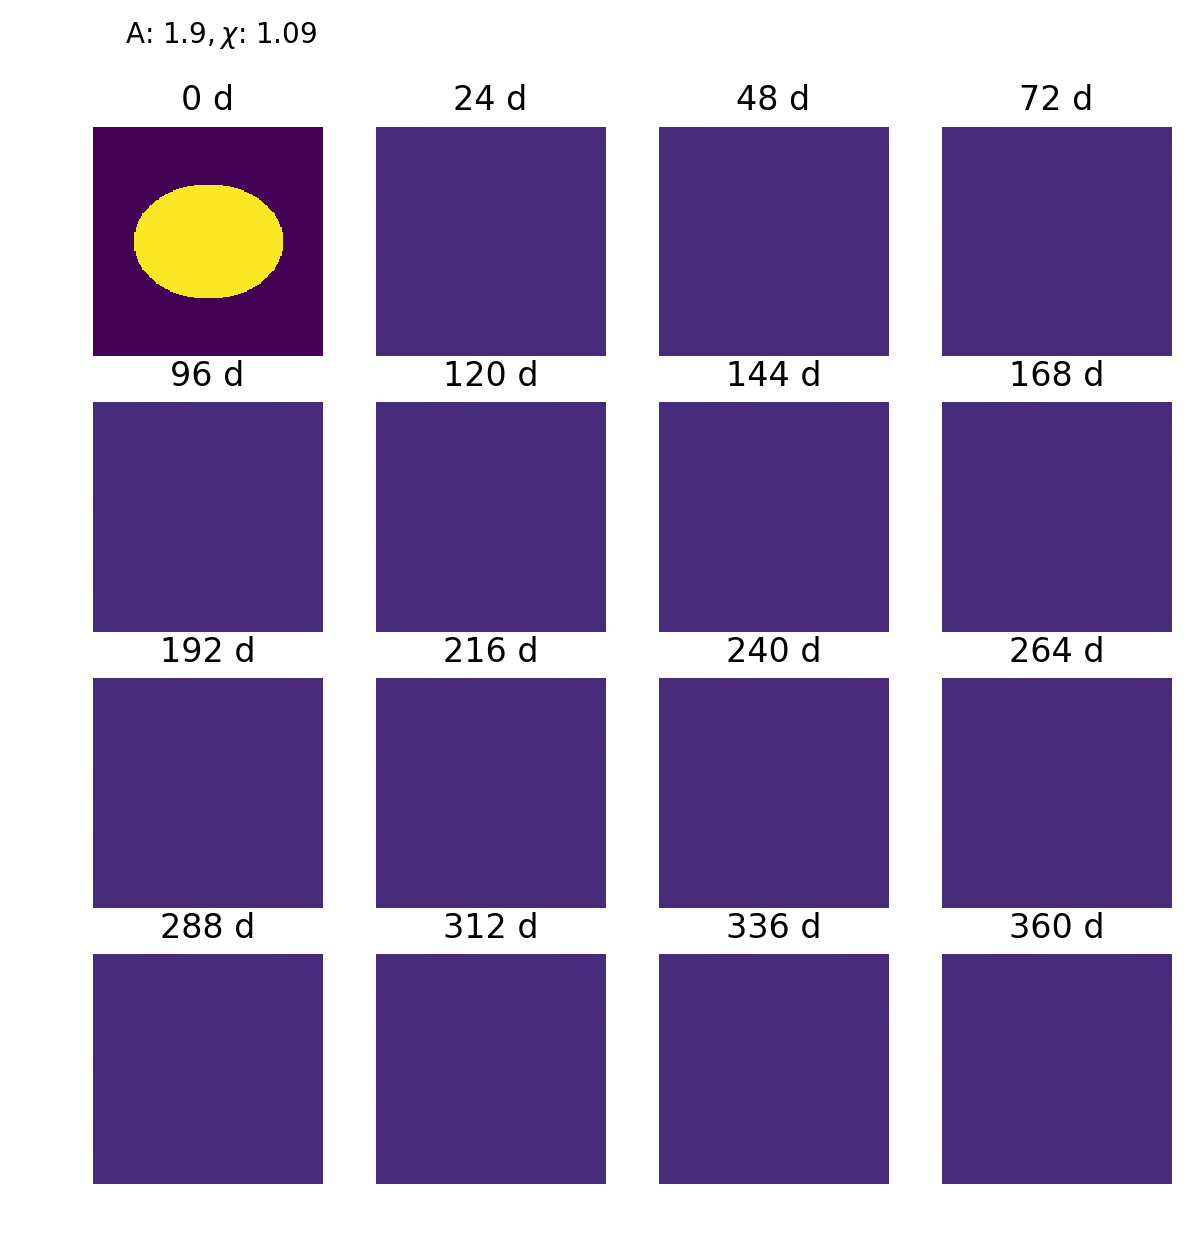

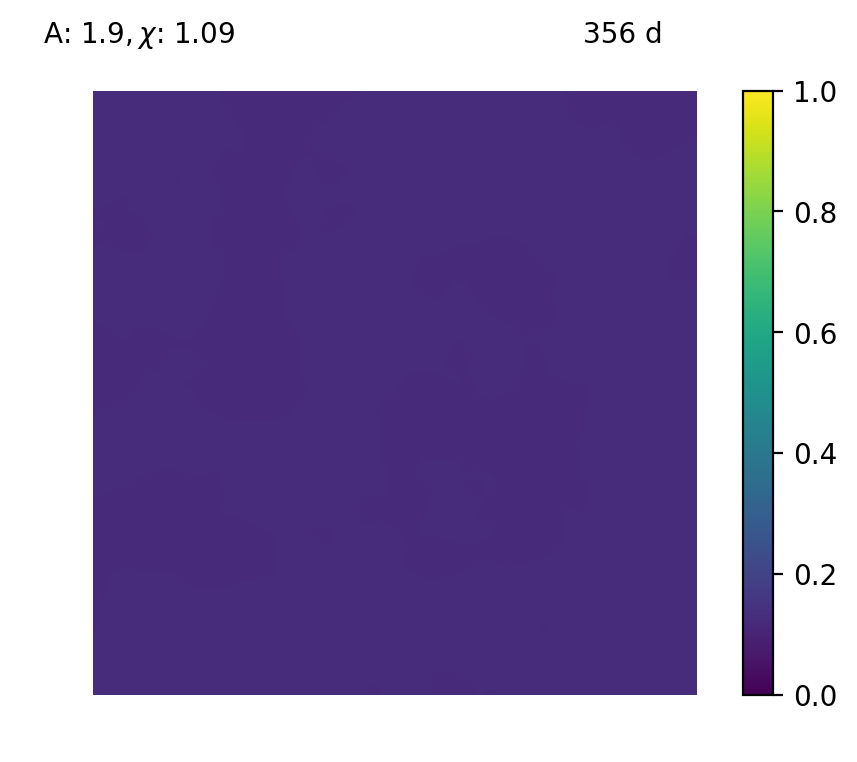

In [13]:
for file in outputfiles:
    with open(file, 'rb') as f:
        resultdict = pickle.load(f)
        base = os.path.basename(file)
        fname = os.path.splitext(base)[0]
        plot_overview(resultdict, 'parvariation/chi_1.09/results/'+fname)
        create_movie(resultdict, 'parvariation/chi_1.09/results/'+fname)